## 金融风控项目
在此项目中，你需要完成金融风控模型的搭建。 基于一个用户的基本信息、历史信息来预测逾期与否。采样的具体数据是拍拍贷数据。https://www.kesci.com/home/competition/56cd5f02b89b5bd026cb39c9/content/1
在此数据中提供了三种不同类型的数据:
1. Master: 用户的主要信息
2. Loginfo: 登录信息
3. Userupdateinfo: 修改信息

在本次项目中，我们只使用```Master```的信息来预测一个用户是否会逾期。 数据里有一个字段叫作```Target```是样本的标签（label)。 在```Master```表格里，包含200多个特征，但不少特征具有缺失值。 做项目的时候需要仔细处理一下。 

对于特征处理方面的技术，请参考本章视频课程里的内容。

本项目区别于之前的项目，希望大家能够开放性地思考，不要太局限于给定的条条框框，把目前为止学到的知识都用起来。所以在项目的设计上区别于之前的，没有设置太多的框架性的，大家可以按照自己的思路灵活做项目。 由于项目本身来自于数据竞赛，所以可以试着跟竞赛里的TOP选手的结果做一下对比，看看跟他们的差距或者优势在哪儿。

```数据```
- ```Training/PPD_Training_Master_GBK_3_1_Training_Set.csv```:  训练数据
- ```Test/PPD_Master_GBK_2_Test_Set.csv```: 测试数据


强调：一定要把注释写清楚。 每个函数，每一个模块具体做什么写清楚。

> 注意： 除了下面导入的库，还有sklearn、XGBoost等经典的库之外，建议不要使用其他的函数库。 如果你不得不使用一些其他特殊的库，请把环境注明在requirements.txt里面，不然我们判作业的时候就没有办法去评判了。 

In [1]:
import math
import os 
import warnings

import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

%matplotlib inline
sns.set_palette('muted')
sns.set_style('darkgrid')
pd.set_option('display.float_format',lambda x:'%.3f' % x)
pd.set_option("max_columns", 300)
warnings.filterwarnings('ignore')

print('导入及设置成功')

导入及设置成功


In [2]:
# 读取Master数据
data = pd.read_csv('data/Training/PPD_Training_Master_GBK_3_1_Training_Set.csv',encoding='gb18030')
print (data.shape)

(30000, 228)


In [3]:
# 将max_columns设置为300，由于本次的数据集共有200多个特征，因此设为300后可以展示数据所有特征
pd.set_option("max_columns", 300)
# 展示记录
data.head()

,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_1,WeblogInfo_2,WeblogInfo_3,WeblogInfo_4,WeblogInfo_5,WeblogInfo_6,WeblogInfo_7,WeblogInfo_8,WeblogInfo_9,WeblogInfo_10,WeblogInfo_11,WeblogInfo_12,WeblogInfo_13,WeblogInfo_14,WeblogInfo_15,WeblogInfo_16,WeblogInfo_17,WeblogInfo_18,UserInfo_5,UserInfo_6,UserInfo_7,UserInfo_8,UserInfo_9,UserInfo_10,UserInfo_11,UserInfo_12,UserInfo_13,UserInfo_14,UserInfo_15,UserInfo_16,UserInfo_17,UserInfo_18,UserInfo_19,UserInfo_20,UserInfo_21,UserInfo_22,UserInfo_23,UserInfo_24,Education_Info1,Education_Info2,Education_Info3,Education_Info4,Education_Info5,Education_Info6,Education_Info7,Education_Info8,WeblogInfo_19,WeblogInfo_20,WeblogInfo_21,WeblogInfo_23,WeblogInfo_24,WeblogInfo_25,WeblogInfo_26,WeblogInfo_27,WeblogInfo_28,WeblogInfo_29,WeblogInfo_30,WeblogInfo_31,WeblogInfo_32,WeblogInfo_33,WeblogInfo_34,WeblogInfo_35,WeblogInfo_36,WeblogInfo_37,WeblogInfo_38,WeblogInfo_39,WeblogInfo_40,WeblogInfo_41,WeblogInfo_42,WeblogInfo_43,WeblogInfo_44,WeblogInfo_45,WeblogInfo_46,WeblogInfo_47,WeblogInfo_48,WeblogInfo_49,WeblogInfo_50,WeblogInfo_51,WeblogInfo_52,WeblogInfo_53,WeblogInfo_54,WeblogInfo_55,WeblogInfo_56,WeblogInfo_57,WeblogInfo_58,ThirdParty_Info_Period1_1,ThirdParty_Info_Period1_2,ThirdParty_Info_Period1_3,ThirdParty_Info_Period1_4,ThirdParty_Info_Period1_5,ThirdParty_Info_Period1_6,ThirdParty_Info_Period1_7,ThirdParty_Info_Period1_8,ThirdParty_Info_Period1_9,ThirdParty_Info_Period1_10,ThirdParty_Info_Period1_11,ThirdParty_Info_Period1_12,ThirdParty_Info_Period1_13,ThirdParty_Info_Period1_14,ThirdParty_Info_Period1_15,ThirdParty_Info_Period1_16,ThirdParty_Info_Period1_17,ThirdParty_Info_Period2_1,ThirdParty_Info_Period2_2,ThirdParty_Info_Period2_3,ThirdParty_Info_Period2_4,ThirdParty_Info_Period2_5,ThirdParty_Info_Period2_6,ThirdParty_Info_Period2_7,ThirdParty_Info_Period2_8,ThirdParty_Info_Period2_9,ThirdParty_Info_Period2_10,ThirdParty_Info_Period2_11,ThirdParty_Info_Period2_12,ThirdParty_Info_Period2_13,ThirdParty_Info_Period2_14,ThirdParty_Info_Period2_15,ThirdParty_Info_Period2_16,ThirdParty_Info_Period2_17,ThirdParty_Info_Period3_1,ThirdParty_Info_Period3_2,ThirdParty_Info_Period3_3,ThirdParty_Info_Period3_4,ThirdParty_Info_Period3_5,ThirdParty_Info_Period3_6,ThirdParty_Info_Period3_7,ThirdParty_Info_Period3_8,ThirdParty_Info_Period3_9,ThirdParty_Info_Period3_10,ThirdParty_Info_Period3_11,ThirdParty_Info_Period3_12,ThirdParty_Info_Period3_13,ThirdParty_Info_Period3_14,ThirdParty_Info_Period3_15,ThirdParty_Info_Period3_16,ThirdParty_Info_Period3_17,ThirdParty_Info_Period4_1,ThirdParty_Info_Period4_2,ThirdParty_Info_Period4_3,ThirdParty_Info_Period4_4,ThirdParty_Info_Period4_5,ThirdParty_Info_Period4_6,ThirdParty_Info_Period4_7,ThirdParty_Info_Period4_8,ThirdParty_Info_Period4_9,ThirdParty_Info_Period4_10,ThirdParty_Info_Period4_11,ThirdParty_Info_Period4_12,ThirdParty_Info_Period4_13,ThirdParty_Info_Period4_14,ThirdParty_Info_Period4_15,ThirdParty_Info_Period4_16,ThirdParty_Info_Period4_17,ThirdParty_Info_Period5_1,ThirdParty_Info_Period5_2,ThirdParty_Info_Period5_3,ThirdParty_Info_Period5_4,ThirdParty_Info_Period5_5,ThirdParty_Info_Period5_6,ThirdParty_Info_Period5_7,ThirdParty_Info_Period5_8,ThirdParty_Info_Period5_9,ThirdParty_Info_Period5_10,ThirdParty_Info_Period5_11,ThirdParty_Info_Period5_12,ThirdParty_Info_Period5_13,ThirdParty_Info_Period5_14,ThirdParty_Info_Period5_15,ThirdParty_Info_Period5_16,ThirdParty_Info_Period5_17,ThirdParty_Info_Period6_1,ThirdParty_Info_Period6_2,ThirdParty_Info_Period6_3,ThirdParty_Info_Period6_4,ThirdParty_Info_Period6_5,ThirdParty_Info_Period6_6,ThirdParty_Info_Period6_7,ThirdParty_Info_Period6_8,ThirdParty_Info_Period6_9,ThirdParty_Info_Period6_10,ThirdParty_Info_Period6_11,ThirdParty_Info_Period6_12,ThirdParty_Info_Period6_13,ThirdParty_Info_Period6_14,ThirdParty_Info_Period6_15,ThirdParty_Info_Period6_16,ThirdParty_Info_Period6_17,ThirdParty_Info_Period7_1,ThirdParty_Info_Period7_2,ThirdParty_Info_Period7_3,ThirdParty_Info_Perio

In [4]:
# 正负样本的比例，查看样本比例是否不平衡
# 提取出标签中0和1的数量，其中0代表正常还款，为正样本，1代表逾期，为负样本
df_target = data['target'].value_counts()
# 打印结果
print(df_target)
# 计算正样本比例
pos_proportion = df_target[0] / (df_target[0] + df_target[1])
# 计算负样本比例
neg_proportion = df_target[1] / (df_target[0] + df_target[1])
# 打印正负样本比例结果
print('正样本（没有逾期）的比例为:%.2f' % (pos_proportion))
print('负样本（逾期）的比例为:%.2f' % (neg_proportion))
# 通过统计可知，正负样本比例已经超过10:1，样本很不平衡

0    27802
1     2198
Name: target, dtype: int64
正样本（没有逾期）的比例为:0.93
负样本（逾期）的比例为:0.07


好了，剩下的部分需要由大家完成。 我大致给一下思路，然后大家可以按照这个思路去一步步完成。 

> #### 1. 数据的预处。 需要考虑以下几个方面：
- ```缺失值```。数据里有大量的缺失值，需要做一些处理。 
- ```字符串的清洗```。比如“北京市”和“北京”合并成“北京”， 统一转换成小写等
- ```二值化```。具体方法请参考课程里的介绍
- ```衍生特征```：比如户籍地和当前城市是否是同一个？ 
- ```特征的独热编码```：对于类别型特征使用独热编码形式
- ```连续性特征的处理```：根据情况来处理
- ```其他```: 根据情况，自行决定要不要做

1.0.1 1.1第一轮预处理：缺失值处理
- ```1、查看每个特征缺失值数量```
- ```2、可视化每个特征缺失值的数量```
- ```3、删除缺失值过多的特征```
- ```4、填充缺失值```
- ```5、重新查看缺失值是否为0```

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 228 entries, Idx to ListingInfo
dtypes: float64(38), int64(170), object(20)
memory usage: 52.2+ MB


In [6]:
'''
1、计算每个特征的缺失值比例
'''
# 使用pandas的isnull方法和sum方法，计算每个特征里的缺失值数量，并将结果存入dataset_info内
dataset_info = data.isnull().sum()
# 创建一个新DataFrame，命名为df_feature，其索引为每个特征的名称，值为每个特征的缺失值数量
df_feature = pd.DataFrame(data=dataset_info.values, index=dataset_info.index, columns=['缺失值数量'])
# 提取df_feature中所有具有缺失值的特征，并将结果存入df_feature_nan
df_feature_nan = df_feature[df_feature['缺失值数量']>0]
# df_feature_nan内新增加一列，该列信息为每个特征的缺失值数量占比
df_feature_nan['缺失值占比'] = df_feature_nan['缺失值数量'] / len(data)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


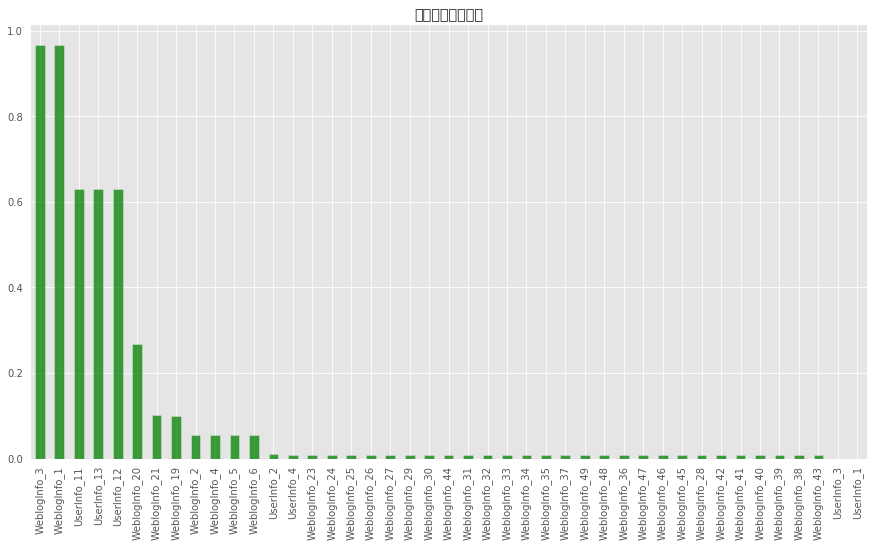

In [17]:
'''
2、可视化每个特征缺失值的比例：
'''
# 定义bar_figure函数
def bar_figure(plot_data, title, figsize):
    '''
    该函数功能是对数据降序排列后进行柱状图可视化
    plot_data:需要做可视化的数据
    title:图的标题
    figsize:图的大小
    '''
    # 设置画图样式
    matplotlib.style.use('ggplot')
    # 指定默认字体 SimHei为黑体
    matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    # 正常显示负号
    matplotlib.rcParams['axes.unicode_minus'] = False 
    # 画图
    plt.figure()
    # 画柱状图，大小设置为（15,8），颜色为绿色，并带网格，透明度为0.75
    plot_data.plot(kind='bar', figsize=figsize, color='g', grid=True, alpha=0.75)
    # 添加图的标题
    plt.title(label=title)
    # 展示可视化结果
    return plt.show()

# 对df_feature_nan的‘缺失值占比’列进行降序排序（等同于对‘缺失值数量’降序排序）
df_feature_nan.sort_values(by='缺失值占比', axis=0, ascending=False, inplace=True)
# 通过bar_figure函数对df_feature_nan的‘缺失值占比’进行可视化
bar_figure(plot_data=df_feature_nan['缺失值占比'], title=u'各特征缺失值占比', figsize=(15,8))

In [8]:
'''
3、删除缺失值过多的特征:
通过1.0.1.1分析得知,WeblogInfo_1、WeblogInfo_3、UserInfo_11、UserInfo_12、UserInfo_13
以上5个特征缺失值都超过了60%，因此做删除处理
'''
# 通过drop方法将缺失值较多的特征删除
data.drop(['WeblogInfo_1','WeblogInfo_3','UserInfo_11','UserInfo_12','UserInfo_13','WeblogInfo_20'], axis=1, inplace=True)

In [9]:
data.head()

,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_2,WeblogInfo_4,WeblogInfo_5,WeblogInfo_6,WeblogInfo_7,WeblogInfo_8,WeblogInfo_9,WeblogInfo_10,WeblogInfo_11,WeblogInfo_12,WeblogInfo_13,WeblogInfo_14,WeblogInfo_15,WeblogInfo_16,WeblogInfo_17,WeblogInfo_18,UserInfo_5,UserInfo_6,UserInfo_7,UserInfo_8,UserInfo_9,UserInfo_10,UserInfo_14,UserInfo_15,UserInfo_16,UserInfo_17,UserInfo_18,UserInfo_19,UserInfo_20,UserInfo_21,UserInfo_22,UserInfo_23,UserInfo_24,Education_Info1,Education_Info2,Education_Info3,Education_Info4,Education_Info5,Education_Info6,Education_Info7,Education_Info8,WeblogInfo_19,WeblogInfo_21,WeblogInfo_23,WeblogInfo_24,WeblogInfo_25,WeblogInfo_26,WeblogInfo_27,WeblogInfo_28,WeblogInfo_29,WeblogInfo_30,WeblogInfo_31,WeblogInfo_32,WeblogInfo_33,WeblogInfo_34,WeblogInfo_35,WeblogInfo_36,WeblogInfo_37,WeblogInfo_38,WeblogInfo_39,WeblogInfo_40,WeblogInfo_41,WeblogInfo_42,WeblogInfo_43,WeblogInfo_44,WeblogInfo_45,WeblogInfo_46,WeblogInfo_47,WeblogInfo_48,WeblogInfo_49,WeblogInfo_50,WeblogInfo_51,WeblogInfo_52,WeblogInfo_53,WeblogInfo_54,WeblogInfo_55,WeblogInfo_56,WeblogInfo_57,WeblogInfo_58,ThirdParty_Info_Period1_1,ThirdParty_Info_Period1_2,ThirdParty_Info_Period1_3,ThirdParty_Info_Period1_4,ThirdParty_Info_Period1_5,ThirdParty_Info_Period1_6,ThirdParty_Info_Period1_7,ThirdParty_Info_Period1_8,ThirdParty_Info_Period1_9,ThirdParty_Info_Period1_10,ThirdParty_Info_Period1_11,ThirdParty_Info_Period1_12,ThirdParty_Info_Period1_13,ThirdParty_Info_Period1_14,ThirdParty_Info_Period1_15,ThirdParty_Info_Period1_16,ThirdParty_Info_Period1_17,ThirdParty_Info_Period2_1,ThirdParty_Info_Period2_2,ThirdParty_Info_Period2_3,ThirdParty_Info_Period2_4,ThirdParty_Info_Period2_5,ThirdParty_Info_Period2_6,ThirdParty_Info_Period2_7,ThirdParty_Info_Period2_8,ThirdParty_Info_Period2_9,ThirdParty_Info_Period2_10,ThirdParty_Info_Period2_11,ThirdParty_Info_Period2_12,ThirdParty_Info_Period2_13,ThirdParty_Info_Period2_14,ThirdParty_Info_Period2_15,ThirdParty_Info_Period2_16,ThirdParty_Info_Period2_17,ThirdParty_Info_Period3_1,ThirdParty_Info_Period3_2,ThirdParty_Info_Period3_3,ThirdParty_Info_Period3_4,ThirdParty_Info_Period3_5,ThirdParty_Info_Period3_6,ThirdParty_Info_Period3_7,ThirdParty_Info_Period3_8,ThirdParty_Info_Period3_9,ThirdParty_Info_Period3_10,ThirdParty_Info_Period3_11,ThirdParty_Info_Period3_12,ThirdParty_Info_Period3_13,ThirdParty_Info_Period3_14,ThirdParty_Info_Period3_15,ThirdParty_Info_Period3_16,ThirdParty_Info_Period3_17,ThirdParty_Info_Period4_1,ThirdParty_Info_Period4_2,ThirdParty_Info_Period4_3,ThirdParty_Info_Period4_4,ThirdParty_Info_Period4_5,ThirdParty_Info_Period4_6,ThirdParty_Info_Period4_7,ThirdParty_Info_Period4_8,ThirdParty_Info_Period4_9,ThirdParty_Info_Period4_10,ThirdParty_Info_Period4_11,ThirdParty_Info_Period4_12,ThirdParty_Info_Period4_13,ThirdParty_Info_Period4_14,ThirdParty_Info_Period4_15,ThirdParty_Info_Period4_16,ThirdParty_Info_Period4_17,ThirdParty_Info_Period5_1,ThirdParty_Info_Period5_2,ThirdParty_Info_Period5_3,ThirdParty_Info_Period5_4,ThirdParty_Info_Period5_5,ThirdParty_Info_Period5_6,ThirdParty_Info_Period5_7,ThirdParty_Info_Period5_8,ThirdParty_Info_Period5_9,ThirdParty_Info_Period5_10,ThirdParty_Info_Period5_11,ThirdParty_Info_Period5_12,ThirdParty_Info_Period5_13,ThirdParty_Info_Period5_14,ThirdParty_Info_Period5_15,ThirdParty_Info_Period5_16,ThirdParty_Info_Period5_17,ThirdParty_Info_Period6_1,ThirdParty_Info_Period6_2,ThirdParty_Info_Period6_3,ThirdParty_Info_Period6_4,ThirdParty_Info_Period6_5,ThirdParty_Info_Period6_6,ThirdParty_Info_Period6_7,ThirdParty_Info_Period6_8,ThirdParty_Info_Period6_9,ThirdParty_Info_Period6_10,ThirdParty_Info_Period6_11,ThirdParty_Info_Period6_12,ThirdParty_Info_Period6_13,ThirdParty_Info_Period6_14,ThirdParty_Info_Period6_15,ThirdParty_Info_Period6_16,ThirdParty_Info_Period6_17,ThirdParty_Info_Period7_1,ThirdParty_Info_Period7_2,ThirdParty_Info_Period7_3,ThirdParty_Info_Period7_4,ThirdParty_Info_Period7_5,ThirdParty_Info_Period7_6,ThirdParty_Info_Per

In [10]:
'''
4、填充缺失值:
对于缺失值不多的特征（相对于1.0.1.2里删除的那五个特征，其余有缺失值的特征，缺失数据占比都不超过30%），在做填充处理时：
4.1、对于数值型（int、float）特征，此类缺失值的特征有:UserInfo_1、UserInfo_3、WeblogInfo_2等33个特征，
通过检查这33个特征得到：float、int类型特征都是类似于1、2、3这类的整数，将这些数值型特征视为‘数值型类别特征’，对于
这些特征，缺失值做填充众数处理
4.2、对于类别型特征，填充众数，此类缺失值的特征有:UserInfo_2、UserInfo_4、WeblogInfo_19等5个特征
4.3、创建函数，fill_category_na，实现对类别型特征的缺失值填充众数的功能
4.4、创建两个list，分别存储具有缺失值的数值型特征和类别型特征:
(1) 数值型特征共有33个:
'UserInfo_1', 'UserInfo_3', 'WeblogInfo_2','WeblogInfo_4', 'WeblogInfo_5', 'WeblogInfo_6'，
‘WeblogInfo_23’ - ’WeblogInfo_49’这27个具有连续数字后缀的特征名称
(2) 类别型特征共有5个:
‘UserInfo_2’,‘UserInfo_4’,‘WeblogInfo_19’,‘WeblogInfo_20’,‘WeblogInfo_21’
(3) 考虑到‘WeblogInfo_23’-‘WeblogInfo_49’以及‘WeblogInfo_19’-‘WeblogInfo_21’的名称的连续性，实现这部分内容
创建函数，功能是生成一个列表，里面存储的是名字后缀是连续数字的特征名称
'''

# 定义fill_category_na函数
def fill_category_na(df, columns_list):
    '''
    该函数功能是将样本数据中所有类别型特征中的缺失数据填充为该特征的众数
    df:输入的数据集
    columns_list:为一个列表集合，里面的元素为每个具有缺失值的类别型特征
    最后函数返回值为将缺失值填充成相应特征平均值的样本数据
    '''
    # 遍历每一个具有缺失值的类别型特征
    for column in columns_list:
        # 对每一个类别型特征计算出每个类别的数量
        counts = df[column].value_counts()
        # 将该特征的众数作为填充值 
        df[column].fillna(np.argmax(counts), axis=0, inplace=True)
    # 函数返回值为填充好的样本数据
    return df

# 定义feature_list函数
def feature_list(feature_name, num1, num2):
    '''
    该函数的功能是创建一个列表，列表内的元素是名字后缀是连续数字的特征名称，例如WeblogInfo_23、WeblogInfo_24这些
    feature_name:特征名称，例如WeblogInfo_
    num1:特征名称后缀数字的起始值
    num2:特征名称后缀数字的终止值
    '''
    # 创建空列表，存储特征名称
    lst = []
    # 特征名称后缀数字范围
    for i in range(num1, num2+1):
        # 创建特征名称
        name = feature_name + str(i)
        # 将特征名称加入到列表里
        lst.append(name)
    # 函数返回值为存储了所有特征名称的列表lst
    return lst

# 创建columns_list_numeral，里面加入其它6个具有缺失值的连续型特征名
columns_list_numeral = ['UserInfo_1', 'UserInfo_3', 'WeblogInfo_2', 'WeblogInfo_4', 'WeblogInfo_5', 'WeblogInfo_6']
# 利用feature_list函数生成WeblogInfo_23-WeblogInfo_49这27个特征名称，合并入columns_list_numeral里，构成了具有缺失值的全部数值型特征名称列表
columns_list_numeral.extend(feature_list('WeblogInfo_', 23, 49))
# 创建columns_list_category，里面存入其它2个具有缺失值的类别型特征名
columns_list_category = ['UserInfo_2', 'UserInfo_4', 'WeblogInfo_19', 'WeblogInfo_21']
# 利用feature_list函数生成WeblogInfo_19-WeblogInfo_21这3个特征名称，并合并入columns_list_category里，构成了具有缺失值的全部类别型特征名称列表
# columns_list_category.extend(feature_list('WeblogInfo_', 19, 21))

# 执行fill_category_na函数，填充样本数据中所有数值型特征中的缺失值，填充为各特征的众数
fill_category_na(data, columns_list_numeral)
# 执行fill_category_na函数，填充样本数据中所有类别型特征的缺失值，填充为各特征的众数
fill_category_na(data, columns_list_category)
# 结果展示
data.head()

,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_2,WeblogInfo_4,WeblogInfo_5,WeblogInfo_6,WeblogInfo_7,WeblogInfo_8,WeblogInfo_9,WeblogInfo_10,WeblogInfo_11,WeblogInfo_12,WeblogInfo_13,WeblogInfo_14,WeblogInfo_15,WeblogInfo_16,WeblogInfo_17,WeblogInfo_18,UserInfo_5,UserInfo_6,UserInfo_7,UserInfo_8,UserInfo_9,UserInfo_10,UserInfo_14,UserInfo_15,UserInfo_16,UserInfo_17,UserInfo_18,UserInfo_19,UserInfo_20,UserInfo_21,UserInfo_22,UserInfo_23,UserInfo_24,Education_Info1,Education_Info2,Education_Info3,Education_Info4,Education_Info5,Education_Info6,Education_Info7,Education_Info8,WeblogInfo_19,WeblogInfo_21,WeblogInfo_23,WeblogInfo_24,WeblogInfo_25,WeblogInfo_26,WeblogInfo_27,WeblogInfo_28,WeblogInfo_29,WeblogInfo_30,WeblogInfo_31,WeblogInfo_32,WeblogInfo_33,WeblogInfo_34,WeblogInfo_35,WeblogInfo_36,WeblogInfo_37,WeblogInfo_38,WeblogInfo_39,WeblogInfo_40,WeblogInfo_41,WeblogInfo_42,WeblogInfo_43,WeblogInfo_44,WeblogInfo_45,WeblogInfo_46,WeblogInfo_47,WeblogInfo_48,WeblogInfo_49,WeblogInfo_50,WeblogInfo_51,WeblogInfo_52,WeblogInfo_53,WeblogInfo_54,WeblogInfo_55,WeblogInfo_56,WeblogInfo_57,WeblogInfo_58,ThirdParty_Info_Period1_1,ThirdParty_Info_Period1_2,ThirdParty_Info_Period1_3,ThirdParty_Info_Period1_4,ThirdParty_Info_Period1_5,ThirdParty_Info_Period1_6,ThirdParty_Info_Period1_7,ThirdParty_Info_Period1_8,ThirdParty_Info_Period1_9,ThirdParty_Info_Period1_10,ThirdParty_Info_Period1_11,ThirdParty_Info_Period1_12,ThirdParty_Info_Period1_13,ThirdParty_Info_Period1_14,ThirdParty_Info_Period1_15,ThirdParty_Info_Period1_16,ThirdParty_Info_Period1_17,ThirdParty_Info_Period2_1,ThirdParty_Info_Period2_2,ThirdParty_Info_Period2_3,ThirdParty_Info_Period2_4,ThirdParty_Info_Period2_5,ThirdParty_Info_Period2_6,ThirdParty_Info_Period2_7,ThirdParty_Info_Period2_8,ThirdParty_Info_Period2_9,ThirdParty_Info_Period2_10,ThirdParty_Info_Period2_11,ThirdParty_Info_Period2_12,ThirdParty_Info_Period2_13,ThirdParty_Info_Period2_14,ThirdParty_Info_Period2_15,ThirdParty_Info_Period2_16,ThirdParty_Info_Period2_17,ThirdParty_Info_Period3_1,ThirdParty_Info_Period3_2,ThirdParty_Info_Period3_3,ThirdParty_Info_Period3_4,ThirdParty_Info_Period3_5,ThirdParty_Info_Period3_6,ThirdParty_Info_Period3_7,ThirdParty_Info_Period3_8,ThirdParty_Info_Period3_9,ThirdParty_Info_Period3_10,ThirdParty_Info_Period3_11,ThirdParty_Info_Period3_12,ThirdParty_Info_Period3_13,ThirdParty_Info_Period3_14,ThirdParty_Info_Period3_15,ThirdParty_Info_Period3_16,ThirdParty_Info_Period3_17,ThirdParty_Info_Period4_1,ThirdParty_Info_Period4_2,ThirdParty_Info_Period4_3,ThirdParty_Info_Period4_4,ThirdParty_Info_Period4_5,ThirdParty_Info_Period4_6,ThirdParty_Info_Period4_7,ThirdParty_Info_Period4_8,ThirdParty_Info_Period4_9,ThirdParty_Info_Period4_10,ThirdParty_Info_Period4_11,ThirdParty_Info_Period4_12,ThirdParty_Info_Period4_13,ThirdParty_Info_Period4_14,ThirdParty_Info_Period4_15,ThirdParty_Info_Period4_16,ThirdParty_Info_Period4_17,ThirdParty_Info_Period5_1,ThirdParty_Info_Period5_2,ThirdParty_Info_Period5_3,ThirdParty_Info_Period5_4,ThirdParty_Info_Period5_5,ThirdParty_Info_Period5_6,ThirdParty_Info_Period5_7,ThirdParty_Info_Period5_8,ThirdParty_Info_Period5_9,ThirdParty_Info_Period5_10,ThirdParty_Info_Period5_11,ThirdParty_Info_Period5_12,ThirdParty_Info_Period5_13,ThirdParty_Info_Period5_14,ThirdParty_Info_Period5_15,ThirdParty_Info_Period5_16,ThirdParty_Info_Period5_17,ThirdParty_Info_Period6_1,ThirdParty_Info_Period6_2,ThirdParty_Info_Period6_3,ThirdParty_Info_Period6_4,ThirdParty_Info_Period6_5,ThirdParty_Info_Period6_6,ThirdParty_Info_Period6_7,ThirdParty_Info_Period6_8,ThirdParty_Info_Period6_9,ThirdParty_Info_Period6_10,ThirdParty_Info_Period6_11,ThirdParty_Info_Period6_12,ThirdParty_Info_Period6_13,ThirdParty_Info_Period6_14,ThirdParty_Info_Period6_15,ThirdParty_Info_Period6_16,ThirdParty_Info_Period6_17,ThirdParty_Info_Period7_1,ThirdParty_Info_Period7_2,ThirdParty_Info_Period7_3,ThirdParty_Info_Period7_4,ThirdParty_Info_Period7_5,ThirdParty_Info_Period7_6,ThirdParty_Info_Per

In [11]:
'''
5、重新查看缺失值是否为0
填充完所有缺失值后，重新查看样本数据，所有特征都没有缺失值
第一轮数据预处理（填充缺失值）后，目前数据集里没有缺失值了，接下来第二轮预处理
'''
# 使用pandas的isnull方法和sum方法，计算填充处理之后的每个特征里的缺失值数量，并将结果存入dataset_new_info内
dataset_new_info = data.isnull().sum()
# 创建一个新DataFrame，命名为df_feature_new，其索引为每个特征的名称，值为每个特征的缺失值数量
df_feature_new = pd.DataFrame(data=dataset_new_info.values, index=dataset_new_info.index, columns=['缺失值数量'])
# 展示填充处理后的每个特征缺失值之和，若结果为0则说明目前数据集没有缺失值
print('填充缺失值后，数据集所有特征的缺失值之和是:{}'.format(df_feature_new['缺失值数量'].sum()))

填充缺失值后，数据集所有特征的缺失值之和是:0


1.0.1 1.2查看类别型和数值型特征的数量分布
- ```1、各类别型特征的类别数量分布```
- ```2、各数值型特征的数值数量分布```


1.0.1 1.3第二轮预处理：按照特征名称的种类（Idx、UserInfo、WeblogInfo等）进行数据处理
- ```1、Idx数据处理```
- ```2、Target数据处理```
- ```3、UserInfo数据处理```
- ```4、WeblogInfo数据处理```
- ```5、Education数据处理```
- ```6、SocialNetwork数据处理```
- ```7、ListingInfo数据处理```
- ```8、ThirdParty_Info_Period数据处理```


In [12]:
'''
1、Idx数据处理：
1.1、首先查看Idx列数据中，所有不同元素的数量
1.2、若结果为30000，说明该列数据所有元素值全部不同，没有作为特征的价值
1.3、结合1.1和1.2，将Idx列作为数据集的Index
'''
# 使用unique方法，查看Idx字段不同数据的数量,再使用len函数计算长度，若长度为30000，说明该列数据所有元素值全部不同
print('Idx字段不同元素的数量为:{}'.format(len(data['Idx'].unique())))
'''
打印结果为30000，该列数据所有值全部不一样，Idx没有特征价值
'''
# 通过set_index方法，将Idx作为每个数据的Index处理
data = data.set_index('Idx')
# 打印结果
data.head()

Idx字段不同元素的数量为:30000


,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_2,WeblogInfo_4,WeblogInfo_5,WeblogInfo_6,WeblogInfo_7,WeblogInfo_8,WeblogInfo_9,WeblogInfo_10,WeblogInfo_11,WeblogInfo_12,WeblogInfo_13,WeblogInfo_14,WeblogInfo_15,WeblogInfo_16,WeblogInfo_17,WeblogInfo_18,UserInfo_5,UserInfo_6,UserInfo_7,UserInfo_8,UserInfo_9,UserInfo_10,UserInfo_14,UserInfo_15,UserInfo_16,UserInfo_17,UserInfo_18,UserInfo_19,UserInfo_20,UserInfo_21,UserInfo_22,UserInfo_23,UserInfo_24,Education_Info1,Education_Info2,Education_Info3,Education_Info4,Education_Info5,Education_Info6,Education_Info7,Education_Info8,WeblogInfo_19,WeblogInfo_21,WeblogInfo_23,WeblogInfo_24,WeblogInfo_25,WeblogInfo_26,WeblogInfo_27,WeblogInfo_28,WeblogInfo_29,WeblogInfo_30,WeblogInfo_31,WeblogInfo_32,WeblogInfo_33,WeblogInfo_34,WeblogInfo_35,WeblogInfo_36,WeblogInfo_37,WeblogInfo_38,WeblogInfo_39,WeblogInfo_40,WeblogInfo_41,WeblogInfo_42,WeblogInfo_43,WeblogInfo_44,WeblogInfo_45,WeblogInfo_46,WeblogInfo_47,WeblogInfo_48,WeblogInfo_49,WeblogInfo_50,WeblogInfo_51,WeblogInfo_52,WeblogInfo_53,WeblogInfo_54,WeblogInfo_55,WeblogInfo_56,WeblogInfo_57,WeblogInfo_58,ThirdParty_Info_Period1_1,ThirdParty_Info_Period1_2,ThirdParty_Info_Period1_3,ThirdParty_Info_Period1_4,ThirdParty_Info_Period1_5,ThirdParty_Info_Period1_6,ThirdParty_Info_Period1_7,ThirdParty_Info_Period1_8,ThirdParty_Info_Period1_9,ThirdParty_Info_Period1_10,ThirdParty_Info_Period1_11,ThirdParty_Info_Period1_12,ThirdParty_Info_Period1_13,ThirdParty_Info_Period1_14,ThirdParty_Info_Period1_15,ThirdParty_Info_Period1_16,ThirdParty_Info_Period1_17,ThirdParty_Info_Period2_1,ThirdParty_Info_Period2_2,ThirdParty_Info_Period2_3,ThirdParty_Info_Period2_4,ThirdParty_Info_Period2_5,ThirdParty_Info_Period2_6,ThirdParty_Info_Period2_7,ThirdParty_Info_Period2_8,ThirdParty_Info_Period2_9,ThirdParty_Info_Period2_10,ThirdParty_Info_Period2_11,ThirdParty_Info_Period2_12,ThirdParty_Info_Period2_13,ThirdParty_Info_Period2_14,ThirdParty_Info_Period2_15,ThirdParty_Info_Period2_16,ThirdParty_Info_Period2_17,ThirdParty_Info_Period3_1,ThirdParty_Info_Period3_2,ThirdParty_Info_Period3_3,ThirdParty_Info_Period3_4,ThirdParty_Info_Period3_5,ThirdParty_Info_Period3_6,ThirdParty_Info_Period3_7,ThirdParty_Info_Period3_8,ThirdParty_Info_Period3_9,ThirdParty_Info_Period3_10,ThirdParty_Info_Period3_11,ThirdParty_Info_Period3_12,ThirdParty_Info_Period3_13,ThirdParty_Info_Period3_14,ThirdParty_Info_Period3_15,ThirdParty_Info_Period3_16,ThirdParty_Info_Period3_17,ThirdParty_Info_Period4_1,ThirdParty_Info_Period4_2,ThirdParty_Info_Period4_3,ThirdParty_Info_Period4_4,ThirdParty_Info_Period4_5,ThirdParty_Info_Period4_6,ThirdParty_Info_Period4_7,ThirdParty_Info_Period4_8,ThirdParty_Info_Period4_9,ThirdParty_Info_Period4_10,ThirdParty_Info_Period4_11,ThirdParty_Info_Period4_12,ThirdParty_Info_Period4_13,ThirdParty_Info_Period4_14,ThirdParty_Info_Period4_15,ThirdParty_Info_Period4_16,ThirdParty_Info_Period4_17,ThirdParty_Info_Period5_1,ThirdParty_Info_Period5_2,ThirdParty_Info_Period5_3,ThirdParty_Info_Period5_4,ThirdParty_Info_Period5_5,ThirdParty_Info_Period5_6,ThirdParty_Info_Period5_7,ThirdParty_Info_Period5_8,ThirdParty_Info_Period5_9,ThirdParty_Info_Period5_10,ThirdParty_Info_Period5_11,ThirdParty_Info_Period5_12,ThirdParty_Info_Period5_13,ThirdParty_Info_Period5_14,ThirdParty_Info_Period5_15,ThirdParty_Info_Period5_16,ThirdParty_Info_Period5_17,ThirdParty_Info_Period6_1,ThirdParty_Info_Period6_2,ThirdParty_Info_Period6_3,ThirdParty_Info_Period6_4,ThirdParty_Info_Period6_5,ThirdParty_Info_Period6_6,ThirdParty_Info_Period6_7,ThirdParty_Info_Period6_8,ThirdParty_Info_Period6_9,ThirdParty_Info_Period6_10,ThirdParty_Info_Period6_11,ThirdParty_Info_Period6_12,ThirdParty_Info_Period6_13,ThirdParty_Info_Period6_14,ThirdParty_Info_Period6_15,ThirdParty_Info_Period6_16,ThirdParty_Info_Period6_17,ThirdParty_Info_Period7_1,ThirdParty_Info_Period7_2,ThirdParty_Info_Period7_3,ThirdParty_Info_Period7_4,ThirdParty_Info_Period7_5,ThirdParty_Info_Period7_6,ThirdParty_Info_Period7

In [13]:
'''
2、Target数据处理
target列作为数据集的标签，在原数据集中放在了最后，为了看数据更加方便，把target放在第一列
'''
# 将target列数据提取出来，并存入front
front = data['target']
# 删除数据集中target列数据
data.drop('target', axis=1, inplace=True)
# 使用insert方法，将target数据插入到数据集第一列
data.insert(0, 'target', front)
# 展示结果
data.head()

,target,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_2,WeblogInfo_4,WeblogInfo_5,WeblogInfo_6,WeblogInfo_7,WeblogInfo_8,WeblogInfo_9,WeblogInfo_10,WeblogInfo_11,WeblogInfo_12,WeblogInfo_13,WeblogInfo_14,WeblogInfo_15,WeblogInfo_16,WeblogInfo_17,WeblogInfo_18,UserInfo_5,UserInfo_6,UserInfo_7,UserInfo_8,UserInfo_9,UserInfo_10,UserInfo_14,UserInfo_15,UserInfo_16,UserInfo_17,UserInfo_18,UserInfo_19,UserInfo_20,UserInfo_21,UserInfo_22,UserInfo_23,UserInfo_24,Education_Info1,Education_Info2,Education_Info3,Education_Info4,Education_Info5,Education_Info6,Education_Info7,Education_Info8,WeblogInfo_19,WeblogInfo_21,WeblogInfo_23,WeblogInfo_24,WeblogInfo_25,WeblogInfo_26,WeblogInfo_27,WeblogInfo_28,WeblogInfo_29,WeblogInfo_30,WeblogInfo_31,WeblogInfo_32,WeblogInfo_33,WeblogInfo_34,WeblogInfo_35,WeblogInfo_36,WeblogInfo_37,WeblogInfo_38,WeblogInfo_39,WeblogInfo_40,WeblogInfo_41,WeblogInfo_42,WeblogInfo_43,WeblogInfo_44,WeblogInfo_45,WeblogInfo_46,WeblogInfo_47,WeblogInfo_48,WeblogInfo_49,WeblogInfo_50,WeblogInfo_51,WeblogInfo_52,WeblogInfo_53,WeblogInfo_54,WeblogInfo_55,WeblogInfo_56,WeblogInfo_57,WeblogInfo_58,ThirdParty_Info_Period1_1,ThirdParty_Info_Period1_2,ThirdParty_Info_Period1_3,ThirdParty_Info_Period1_4,ThirdParty_Info_Period1_5,ThirdParty_Info_Period1_6,ThirdParty_Info_Period1_7,ThirdParty_Info_Period1_8,ThirdParty_Info_Period1_9,ThirdParty_Info_Period1_10,ThirdParty_Info_Period1_11,ThirdParty_Info_Period1_12,ThirdParty_Info_Period1_13,ThirdParty_Info_Period1_14,ThirdParty_Info_Period1_15,ThirdParty_Info_Period1_16,ThirdParty_Info_Period1_17,ThirdParty_Info_Period2_1,ThirdParty_Info_Period2_2,ThirdParty_Info_Period2_3,ThirdParty_Info_Period2_4,ThirdParty_Info_Period2_5,ThirdParty_Info_Period2_6,ThirdParty_Info_Period2_7,ThirdParty_Info_Period2_8,ThirdParty_Info_Period2_9,ThirdParty_Info_Period2_10,ThirdParty_Info_Period2_11,ThirdParty_Info_Period2_12,ThirdParty_Info_Period2_13,ThirdParty_Info_Period2_14,ThirdParty_Info_Period2_15,ThirdParty_Info_Period2_16,ThirdParty_Info_Period2_17,ThirdParty_Info_Period3_1,ThirdParty_Info_Period3_2,ThirdParty_Info_Period3_3,ThirdParty_Info_Period3_4,ThirdParty_Info_Period3_5,ThirdParty_Info_Period3_6,ThirdParty_Info_Period3_7,ThirdParty_Info_Period3_8,ThirdParty_Info_Period3_9,ThirdParty_Info_Period3_10,ThirdParty_Info_Period3_11,ThirdParty_Info_Period3_12,ThirdParty_Info_Period3_13,ThirdParty_Info_Period3_14,ThirdParty_Info_Period3_15,ThirdParty_Info_Period3_16,ThirdParty_Info_Period3_17,ThirdParty_Info_Period4_1,ThirdParty_Info_Period4_2,ThirdParty_Info_Period4_3,ThirdParty_Info_Period4_4,ThirdParty_Info_Period4_5,ThirdParty_Info_Period4_6,ThirdParty_Info_Period4_7,ThirdParty_Info_Period4_8,ThirdParty_Info_Period4_9,ThirdParty_Info_Period4_10,ThirdParty_Info_Period4_11,ThirdParty_Info_Period4_12,ThirdParty_Info_Period4_13,ThirdParty_Info_Period4_14,ThirdParty_Info_Period4_15,ThirdParty_Info_Period4_16,ThirdParty_Info_Period4_17,ThirdParty_Info_Period5_1,ThirdParty_Info_Period5_2,ThirdParty_Info_Period5_3,ThirdParty_Info_Period5_4,ThirdParty_Info_Period5_5,ThirdParty_Info_Period5_6,ThirdParty_Info_Period5_7,ThirdParty_Info_Period5_8,ThirdParty_Info_Period5_9,ThirdParty_Info_Period5_10,ThirdParty_Info_Period5_11,ThirdParty_Info_Period5_12,ThirdParty_Info_Period5_13,ThirdParty_Info_Period5_14,ThirdParty_Info_Period5_15,ThirdParty_Info_Period5_16,ThirdParty_Info_Period5_17,ThirdParty_Info_Period6_1,ThirdParty_Info_Period6_2,ThirdParty_Info_Period6_3,ThirdParty_Info_Period6_4,ThirdParty_Info_Period6_5,ThirdParty_Info_Period6_6,ThirdParty_Info_Period6_7,ThirdParty_Info_Period6_8,ThirdParty_Info_Period6_9,ThirdParty_Info_Period6_10,ThirdParty_Info_Period6_11,ThirdParty_Info_Period6_12,ThirdParty_Info_Period6_13,ThirdParty_Info_Period6_14,ThirdParty_Info_Period6_15,ThirdParty_Info_Period6_16,ThirdParty_Info_Period6_17,ThirdParty_Info_Period7_1,ThirdParty_Info_Period7_2,ThirdParty_Info_Period7_3,ThirdParty_Info_Period7_4,ThirdParty_Info_Period7_5,ThirdParty_Info_Period7_6,ThirdParty_Info_

由于特征太多只选择UserInfo和Education做处理😔

In [14]:
data.columns.to_list()

['target',
 'UserInfo_1',
 'UserInfo_2',
 'UserInfo_3',
 'UserInfo_4',
 'WeblogInfo_2',
 'WeblogInfo_4',
 'WeblogInfo_5',
 'WeblogInfo_6',
 'WeblogInfo_7',
 'WeblogInfo_8',
 'WeblogInfo_9',
 'WeblogInfo_10',
 'WeblogInfo_11',
 'WeblogInfo_12',
 'WeblogInfo_13',
 'WeblogInfo_14',
 'WeblogInfo_15',
 'WeblogInfo_16',
 'WeblogInfo_17',
 'WeblogInfo_18',
 'UserInfo_5',
 'UserInfo_6',
 'UserInfo_7',
 'UserInfo_8',
 'UserInfo_9',
 'UserInfo_10',
 'UserInfo_14',
 'UserInfo_15',
 'UserInfo_16',
 'UserInfo_17',
 'UserInfo_18',
 'UserInfo_19',
 'UserInfo_20',
 'UserInfo_21',
 'UserInfo_22',
 'UserInfo_23',
 'UserInfo_24',
 'Education_Info1',
 'Education_Info2',
 'Education_Info3',
 'Education_Info4',
 'Education_Info5',
 'Education_Info6',
 'Education_Info7',
 'Education_Info8',
 'WeblogInfo_19',
 'WeblogInfo_21',
 'WeblogInfo_23',
 'WeblogInfo_24',
 'WeblogInfo_25',
 'WeblogInfo_26',
 'WeblogInfo_27',
 'WeblogInfo_28',
 'WeblogInfo_29',
 'WeblogInfo_30',
 'WeblogInfo_31',
 'WeblogInfo_32',
 'Web

In [18]:
drop_cols_lst = ['WeblogInfo_2', 'WeblogInfo_4', 'WeblogInfo_5', 'WeblogInfo_6', 'WeblogInfo_7', 'WeblogInfo_8', 'WeblogInfo_9', 'WeblogInfo_10', 'WeblogInfo_11', 'WeblogInfo_12', 'WeblogInfo_13', 'WeblogInfo_14', 'WeblogInfo_15', 'WeblogInfo_16', 'WeblogInfo_17', 'WeblogInfo_18', 'WeblogInfo_19', 'WeblogInfo_21', 'WeblogInfo_23', 'WeblogInfo_24', 'WeblogInfo_25', 'WeblogInfo_26', 'WeblogInfo_27', 'WeblogInfo_28', 'WeblogInfo_29', 'WeblogInfo_30', 'WeblogInfo_31', 'WeblogInfo_32', 'WeblogInfo_33', 'WeblogInfo_34', 'WeblogInfo_35', 'WeblogInfo_36', 'WeblogInfo_37', 'WeblogInfo_38', 'WeblogInfo_39', 'WeblogInfo_40', 'WeblogInfo_41', 'WeblogInfo_42', 'WeblogInfo_43', 'WeblogInfo_44', 'WeblogInfo_45', 'WeblogInfo_46', 'WeblogInfo_47', 'WeblogInfo_48', 'WeblogInfo_49', 'WeblogInfo_50', 'WeblogInfo_51', 'WeblogInfo_52', 'WeblogInfo_53', 'WeblogInfo_54', 'WeblogInfo_55', 'WeblogInfo_56', 'WeblogInfo_57', 'WeblogInfo_58', 'ThirdParty_Info_Period1_1', 'ThirdParty_Info_Period1_2', 'ThirdParty_Info_Period1_3', 'ThirdParty_Info_Period1_4', 'ThirdParty_Info_Period1_5', 'ThirdParty_Info_Period1_6', 'ThirdParty_Info_Period1_7', 'ThirdParty_Info_Period1_8', 'ThirdParty_Info_Period1_9', 'ThirdParty_Info_Period1_10', 'ThirdParty_Info_Period1_11', 'ThirdParty_Info_Period1_12', 'ThirdParty_Info_Period1_13', 'ThirdParty_Info_Period1_14', 'ThirdParty_Info_Period1_15', 'ThirdParty_Info_Period1_16', 'ThirdParty_Info_Period1_17', 'ThirdParty_Info_Period2_1', 'ThirdParty_Info_Period2_2', 'ThirdParty_Info_Period2_3', 'ThirdParty_Info_Period2_4', 'ThirdParty_Info_Period2_5', 'ThirdParty_Info_Period2_6', 'ThirdParty_Info_Period2_7', 'ThirdParty_Info_Period2_8', 'ThirdParty_Info_Period2_9', 'ThirdParty_Info_Period2_10', 'ThirdParty_Info_Period2_11', 'ThirdParty_Info_Period2_12', 'ThirdParty_Info_Period2_13', 'ThirdParty_Info_Period2_14', 'ThirdParty_Info_Period2_15', 'ThirdParty_Info_Period2_16', 'ThirdParty_Info_Period2_17', 'ThirdParty_Info_Period3_1', 'ThirdParty_Info_Period3_2', 'ThirdParty_Info_Period3_3', 'ThirdParty_Info_Period3_4', 'ThirdParty_Info_Period3_5', 'ThirdParty_Info_Period3_6', 'ThirdParty_Info_Period3_7', 'ThirdParty_Info_Period3_8', 'ThirdParty_Info_Period3_9', 'ThirdParty_Info_Period3_10', 'ThirdParty_Info_Period3_11', 'ThirdParty_Info_Period3_12', 'ThirdParty_Info_Period3_13', 'ThirdParty_Info_Period3_14', 'ThirdParty_Info_Period3_15', 'ThirdParty_Info_Period3_16', 'ThirdParty_Info_Period3_17', 'ThirdParty_Info_Period4_1', 'ThirdParty_Info_Period4_2', 'ThirdParty_Info_Period4_3', 'ThirdParty_Info_Period4_4', 'ThirdParty_Info_Period4_5', 'ThirdParty_Info_Period4_6', 'ThirdParty_Info_Period4_7', 'ThirdParty_Info_Period4_8', 'ThirdParty_Info_Period4_9', 'ThirdParty_Info_Period4_10', 'ThirdParty_Info_Period4_11', 'ThirdParty_Info_Period4_12', 'ThirdParty_Info_Period4_13', 'ThirdParty_Info_Period4_14', 'ThirdParty_Info_Period4_15', 'ThirdParty_Info_Period4_16', 'ThirdParty_Info_Period4_17', 'ThirdParty_Info_Period5_1', 'ThirdParty_Info_Period5_2', 'ThirdParty_Info_Period5_3', 'ThirdParty_Info_Period5_4', 'ThirdParty_Info_Period5_5', 'ThirdParty_Info_Period5_6', 'ThirdParty_Info_Period5_7', 'ThirdParty_Info_Period5_8', 'ThirdParty_Info_Period5_9', 'ThirdParty_Info_Period5_10', 'ThirdParty_Info_Period5_11', 'ThirdParty_Info_Period5_12', 'ThirdParty_Info_Period5_13', 'ThirdParty_Info_Period5_14', 'ThirdParty_Info_Period5_15', 'ThirdParty_Info_Period5_16', 'ThirdParty_Info_Period5_17', 'ThirdParty_Info_Period6_1', 'ThirdParty_Info_Period6_2', 'ThirdParty_Info_Period6_3', 'ThirdParty_Info_Period6_4', 'ThirdParty_Info_Period6_5', 'ThirdParty_Info_Period6_6', 'ThirdParty_Info_Period6_7', 'ThirdParty_Info_Period6_8', 'ThirdParty_Info_Period6_9', 'ThirdParty_Info_Period6_10', 'ThirdParty_Info_Period6_11', 'ThirdParty_Info_Period6_12', 'ThirdParty_Info_Period6_13', 'ThirdParty_Info_Period6_14', 'ThirdParty_Info_Period6_15', 'ThirdParty_Info_Period6_16', 'ThirdParty_Info_Period6_17', 'ThirdParty_Info_Period7_1', 'ThirdParty_Info_Period7_2', 'ThirdParty_Info_Period7_3', 'ThirdParty_Info_Period7_4', 'ThirdParty_Info_Period7_5', 'ThirdParty_Info_Period7_6', 'ThirdParty_Info_Period7_7', 'ThirdParty_Info_Period7_8', 'ThirdParty_Info_Period7_9', 'ThirdParty_Info_Period7_10', 'ThirdParty_Info_Period7_11', 'ThirdParty_Info_Period7_12', 'ThirdParty_Info_Period7_13', 'ThirdParty_Info_Period7_14', 'ThirdParty_Info_Period7_15', 'ThirdParty_Info_Period7_16', 'ThirdParty_Info_Period7_17', 'SocialNetwork_1', 'SocialNetwork_2', 'SocialNetwork_3', 'SocialNetwork_4', 'SocialNetwork_5', 'SocialNetwork_6', 'SocialNetwork_7', 'SocialNetwork_8', 'SocialNetwork_9', 'SocialNetwork_10', 'SocialNetwork_11', 'SocialNetwork_12', 'SocialNetwork_13', 'SocialNetwork_14', 'SocialNetwork_15', 'SocialNetwork_16', 'SocialNetwork_17']

data.drop(drop_cols_lst, axis=1, inplace=True)
data.head()

,target,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,UserInfo_5,UserInfo_6,UserInfo_7,UserInfo_8,UserInfo_9,UserInfo_10,UserInfo_14,UserInfo_15,UserInfo_16,UserInfo_17,UserInfo_18,UserInfo_19,UserInfo_20,UserInfo_21,UserInfo_22,UserInfo_23,UserInfo_24,Education_Info1,Education_Info2,Education_Info3,Education_Info4,Education_Info5,Education_Info6,Education_Info7,Education_Info8,ListingInfo
Idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,0,1.000,深圳,4.000,深圳,2,2,广东,深圳,中国移动,0,2,2,1,1,29,四川省,南充市,0,D,D,D,0,E,E,E,0,E,E,E,2014/3/5
10002,0,1.000,温州,4.000,温州,2,2,浙江,温州,中国移动,1,3,3,2,2,28,福建省,不详,0,D,D,D,0,E,E,E,0,E,E,E,2014/2/26
10003,0,1.000,宜昌,3.000,宜昌,2,2,湖北,宜昌,中国电信,0,4,4,2,1,32,湖北省,宜昌市,0,D,D,D,0,E,E,E,0,E,E,E,2014/2/28
10006,0,4.000,南平,1.000,南平,2,2,福建,南平,中国移动,0,2,2,1,1,33,江西省,不详,0,D,D,D,0,E,E,E,0,E,E,E,2014/2/25
10007,0,5.000,辽阳,1.000,辽阳,2,2,辽宁,辽阳,中国移动,0,3,3,1,1,43,辽宁省,锦州市,0,D,D,D,0,E,E,E,0,E,E,E,2014/2/27


In [19]:
'''
3、UserInfo数据处理:

3.1、查看UserInfo数据总体情况
在第一轮预处理中，由于UserInfo_11、UserInfo_12、UserInfo_13这三个特征缺失值过多，已经做删除处理
目前UserInfo特征共有UserInfo_1-10和UserInfo_14-24，共21个特征
首先，通过feature_list函数将所有的UserInfo特征合并到一个列表userinfo_feature_list内
其次，利用describe方法查看所有UserInfo特征的总体信息
'''
# 创建空列表，用来存储所有UserInfo特征名
userinfo_feature_list = []
# 利用feature_list生成UserInfo_1-UserInfo_10这10个特征名称，并合并入userinfo_feature_list内
userinfo_feature_list.extend(feature_list('UserInfo_', 1, 10))
# 利用feature_list生成UserInfo_14-UserInfo_24这11个特征名称，并合并入userinfo_feature_list内
userinfo_feature_list.extend(feature_list('UserInfo_', 14, 24))
# 通过pandas的describe方法，查看每个特征的信息
data[userinfo_feature_list].describe(include='all')

,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,UserInfo_5,UserInfo_6,UserInfo_7,UserInfo_8,UserInfo_9,UserInfo_10,UserInfo_14,UserInfo_15,UserInfo_16,UserInfo_17,UserInfo_18,UserInfo_19,UserInfo_20,UserInfo_21,UserInfo_22,UserInfo_23,UserInfo_24
count,30000.000,30000,30000.000,30000,30000.000,30000.000,30000,30000,30000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000,30000,30000.000,30000,30000,30000
unique,nan,327,nan,330,nan,nan,32,655,7,nan,nan,nan,nan,nan,nan,31,297,nan,7,27,1963
top,nan,深圳,nan,深圳,nan,nan,不详,不详,中国移动,nan,nan,nan,nan,nan,nan,广东省,不详,nan,D,D,D
freq,nan,1048,nan,1112,nan,nan,4213,4213,15481,nan,nan,nan,nan,nan,nan,2405,7173,nan,27867,27867,27867
mean,3.219,NaN,4.694,NaN,1.654,1.654,NaN,NaN,NaN,0.311,3.417,3.421,1.612,1.129,29.782,NaN,NaN,0.071,NaN,NaN,NaN
std,1.828,NaN,1.321,NaN,0.585,0.584,NaN,NaN,NaN,0.604,1.171,1.168,1.060,0.336,6.421,NaN,NaN,0.257,NaN,NaN,NaN
min,0.000,NaN,0.000,NaN,1.000,1.000,NaN,NaN,NaN,0.000,0.000,0.000,0.000,1.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN
25%,1.000,NaN,4.000,NaN,1.000,1.000,NaN,NaN,NaN,0.000,3.000,3.000,1.000,1.000,25.000,NaN,NaN,0.000,NaN,NaN,NaN
50%,3.000,NaN,5.000,NaN,2.000,2.000,NaN,NaN,NaN,0.000,3.000,3.000,1.000,1.000,28.000,NaN,NaN,0.000,NaN,NaN,NaN
75%,5.000,NaN,5.000,NaN,2.000,2.000,NaN,NaN,NaN,0.000,4.000,4.000,2.000,1.000,33.000,NaN,NaN,0.000,NaN,NaN,NaN


In [20]:
'''
3.2、UserInfo特征分类:
通过3.1查看每个UserInfo特征信息，可知：
UserInfo_2、UserInfo_4、UserInfo_7-9、UserInfo_19-20、UserInfo_22-24为类别型特征
UserInfo_1、UserInfo_3、UserInfo_5-6、UserInfo_10、UserInfo_14-18、UserInfo_21为数值型特征
'''
# 1、将所有类别型特征名称存入userinfo_category_list
# 创建userinfo_category_list列表，用来存储UserInfo的类别型特征
userinfo_category_list = ['UserInfo_2', 'UserInfo_4']
# 利用feature_list函数生成UserInfo_7-UserInfo_9这3个特征名称，并将结果合并入存入userinfo_category_list
userinfo_category_list.extend(feature_list('UserInfo_', 7, 9))
# 利用feature_list函数生成UserInfo_19-UserInfo_20这2个特征名称，并将结果合并入存入userinfo_category_list
userinfo_category_list.extend(feature_list('UserInfo_', 19, 20))
# 利用feature_list函数生成UserInfo_22-UserInfo_24这3个特征名称，并将结果合并入存入userinfo_category_list
userinfo_category_list.extend(feature_list('UserInfo_', 22, 24))

# 2、将所有数值型特征名称存入userinfo_numerical_list
# 创建userinfo_numerical_list列表，用来存储UserInfo的数值型特征
userinfo_numerical_list = ['UserInfo_1', 'UserInfo_3', 'UserInfo_10', 'UserInfo_21']
# 利用feature_list函数生成UserInfo_5-UserInfo_6这2个特征名称，并将结果合并入存入userinfo_numerical_list
userinfo_numerical_list.extend(feature_list('UserInfo_', 5, 6))
# 利用feature_list函数生成UserInfo_14-UserInfo_18这5个特征名称，并将结果合并入存入userinfo_numerical_list
userinfo_numerical_list.extend(feature_list('UserInfo_', 14, 18))

In [28]:
'''
3.3、UserInfo特征数据处理：
3.3.1、对于类别型特征:
3.3.1.1、UserInfo_9特征为通信运营商信息，需要对数据进行清洗，如:"中国移动"和“中国移动 ”（后面带个空格），需要清洗字符串
3.3.1.2、UserInfo_22、23、24，这3个特征里‘D’占比都非常大:
UserInfo_22有7个类别，UserInfo_23有23个类别，UserInfo_24类别超过了1900个，
3.3.1.3、UserInfo_2、4、7、8、19、20这6个特征与地理位置相关，需要深入分析并创建新特征
3.3.2、对于数值型特征:
3.3.2.1、其他数值型特征里的数值都是诸如0、1、2、3、4等，都不超过10个，因此考虑将这些数值型特征转换成类别型特征
3.3.2.2、UserInfo_18特征里数值较多，对该特征单独分析
3.3.3、做数据处理时，创建4个函数：
category_proportion_figure和target_proportion_figure可视化特征中每个类别/数值的数量比例及0和1标签的比例
figures_in_feature批量展示列表内特征数据数量比例及0和1标签的比例
figures_in_feature_clean批量展示列表内特征数据清洗后的数量比例及0和1标签的比例
'''

def category_proportion_figure(plot_data, figsize, title):
    '''
    该函数功能是统计数据集某一特征的所有类别/数值占该总数的比例，并按照0、1的数量进行堆叠柱状图展示
    plot_data:需要做可视化的数据
    title:图的标题
    figsize:图的大小
    '''
    # 设置画图样式
    matplotlib.style.use('ggplot')
    # 指定默认字体 SimHei为黑体
    matplotlib.rcParams['font.sans-serif'] = ['SimHei']
    # 正常显示负号
    matplotlib.rcParams['axes.unicode_minus'] = False 
    # 使用pyplot的figure方法画图
    plt.figure()
    # 计算该特征里标签0所包含的所有类别占总数据量的占比
    plot_data[0] = plot_data[0] / len(data)
    # 计算该特征里标签1所包含的所有类别占总数据量的占比
    plot_data[1] = plot_data[1] / len(data)
    # 画堆叠柱状图，颜色为绿色，并带网格，透明度为0.75
    plot_data.plot(kind='bar', figsize=figsize, width = 0.25, colormap='summer', grid=True, stacked=True, alpha=1)
    # 添加图的标题
    plt.title(label=title)
    # 展示结果
    return plt.show()


def target_proportion_figure(plot_data, figsize, title):
    '''
    该函数功能是对数据集某一特征的所有类别/数值按照0、1的比例进行堆叠柱状图展示
    plot_data:需要做可视化的数据
    title:图的标题
    figsize:图的大小
    '''
    # 设置画图样式
    matplotlib.style.use('ggplot')
    # 指定默认字体 SimHei为黑体
    matplotlib.rcParams['font.sans-serif'] = ['SimHei']
    # 正常显示负号
    matplotlib.rcParams['axes.unicode_minus'] = False 
    # 使用pyplot的figure方法画图
    plt.figure()
    # 由于输入数据可能会存在nan，利用fillna方法将nan填充为0
    plot_data[0].fillna(0, axis=0, inplace=True)
    plot_data[1].fillna(0, axis=0, inplace=True)
    # 计算0和1的总和
    plot_data['sum'] = plot_data[0] + plot_data[1]
    # 计算0的比例,并重新传给plot_data[0]
    plot_data[0] = plot_data[0] / plot_data['sum']
    # 计算1的比例,并重新传给plot_data[1]
    plot_data[1] = plot_data[1] / plot_data['sum']
    #删除sum列
    plot_data.drop('sum', axis=1, inplace=True)
    # 画堆叠柱状图，颜色为绿色，并带网格，透明度为0.75
    plot_data.plot(kind='bar', figsize=figsize, width = 0.25, colormap='summer', grid=True, stacked=True, alpha=1)
    # 添加图的标题
    plt.title(label=title)
    # 展示结果
    return plt.show()


def figures_in_featurelist(featurelist, name):
    '''
    该函数功能是对列表内所有特征名称所对应的数据进行批量可视化展示，展示每个特征内各个类别的占比
    featurelist:特征名称列表
    name:特征名称
    '''   
    # 遍历列表内每个类别型特征名
    for i in featurelist:
        # 使用split函数提取特征名称的后缀数字
        number = i.split('_')[1]
        # 定义feature_name，为name加上拆分出的后缀数字，例如‘webloginfo_19’
        feature_name = name + number
        # 利用groupby方法将处理后的特征按照类别进行分组，value_counts方法分别统计每个类别中0和1的数量,将结果存入feature_name    
        feature_name = data.groupby(by=i)['target'].value_counts().unstack()
        # 利用category_proportion_figure函数可视化结果
        category_proportion_figure(plot_data=feature_name, figsize=(12,6), title=i+'各类别数量占比')
        # 利用target_proportion_figure函数，重新对处理后的特征各类别中0和1的比例进行可视化
        target_proportion_figure(plot_data=feature_name, figsize=(12,6), title=i+'各类别中0和1标签占比')    

        
def figures_in_featurelist_clean(featurelist, name):
    '''
    该函数功能是对列表内所有特征名称所对应的清洗后的数据进行批量可视化展示，展示每个特征内各个类别的占比和各个类别0、1标签的比例
    featurelist:特征名称列表
    name:特征名称
    '''               
    # 遍历列表内每个类别型特征名
    for i in featurelist:
        # 使用split函数提取特征名称的后缀数字
        number = i.split('_')[1]
        # 定义feature_name，为name加上拆分出的后缀数字，例如‘webloginfo_19’
        feature_name = name + number
        # 利用groupby方法将处理后的特征按照类别进行分组，value_counts方法分别统计每个类别中0和1的数量,将结果存入feature_name    
        feature_name = data.groupby(by=i)['target'].value_counts().unstack()
        # 利用category_proportion_figure函数，重新对处理后的特征各类别比例可视化结果
        category_proportion_figure(plot_data=feature_name, figsize=(12,6), title='特征处理后'+i+'各类别数量占比')                
        # 利用target_proportion_figure函数，重新对处理后的特征各类别中0和1的比例进行可视化
        target_proportion_figure(plot_data=feature_name, figsize=(12,6), title='特征处理后'+i+'各类别中0和1标签占比')    

<Figure size 432x288 with 0 Axes>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


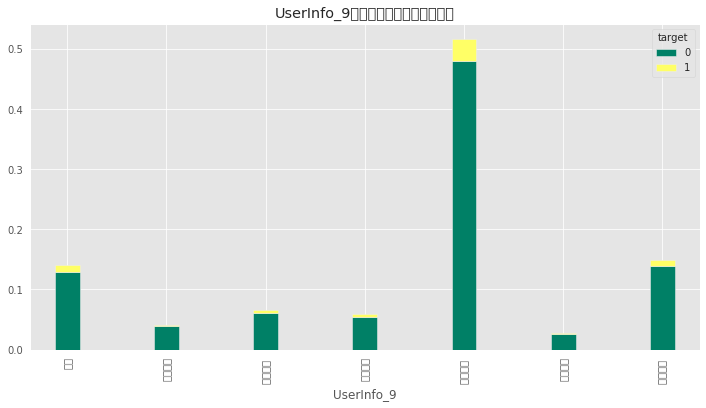

In [22]:
'''
3.3.1.1、UserInfo_9特征处理：
'''
# 利用groupby方法将UserInfo_9特征按照类别（移动、联通等）进行分组
# 利用value_counts方法分别统计每个类别中0和1的数量，将结果存入userinfo_9内
userinfo_9 = data.groupby(by='UserInfo_9')['target'].value_counts().unstack()
# 利用category_proportion_figure函数对UserInfo_9特征各类别中0和1的数量进行可视化
category_proportion_figure(plot_data=userinfo_9, figsize=(12,6), title='UserInfo_9各类别数量占比堆叠柱状图')

<Figure size 432x288 with 0 Axes>

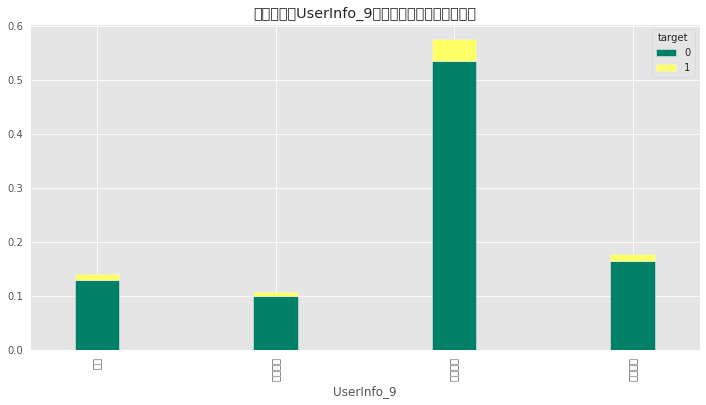

<Figure size 432x288 with 0 Axes>

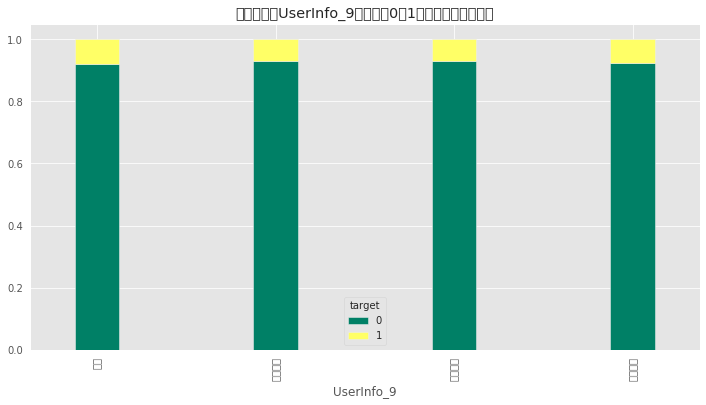

In [23]:
'''
3.3.1.1 通过分析可知:
1、UserInfo9特征里的类别，例如‘中国移动’、‘中国移动 ’，这两个其实属于同一类别，需要对特征名称清洗，去掉空格
2、对于‘不详’，将该类别数据视为缺失数据，同样将其视为一个类别
3、接下来需要对特征数据进行清洗，并重新可视化结果

清洗后的UserInfo9可视化结果：
1、中国移动占比最多，超过55%，中国联通、中国电信的占比都在20%以下
2、3个类别中0和1的占比与项目开头计算的样本0和1的总体占比保持一致
'''
# 利用replace方法去除UserInfo_9内所有数据的空格
data['UserInfo_9'] = data['UserInfo_9'].str.replace(' ', '')
# 重新对UserInfo_9内每个类别中0和1的数量进行统计，并将结果重新存入userinfo_9
userinfo_9 = data.groupby(by='UserInfo_9')['target'].value_counts().unstack()
# 利用category_proportion_figure函数，重新对清洗后的UserInfo_9特征各类别中0和1的数量进行可视化
category_proportion_figure(plot_data=userinfo_9, figsize=(12,6), title='特征处理后UserInfo_9各类别数量占比堆叠柱状图')
# 利用target_proportion_figure函数，重新对清洗后的UserInfo_9特征各类别中0和1的比例进行可视化
target_proportion_figure(plot_data=userinfo_9, figsize=(12,6), title='特征处理后UserInfo_9各类别中0和1标签占比堆叠柱状图')

<Figure size 432x288 with 0 Axes>

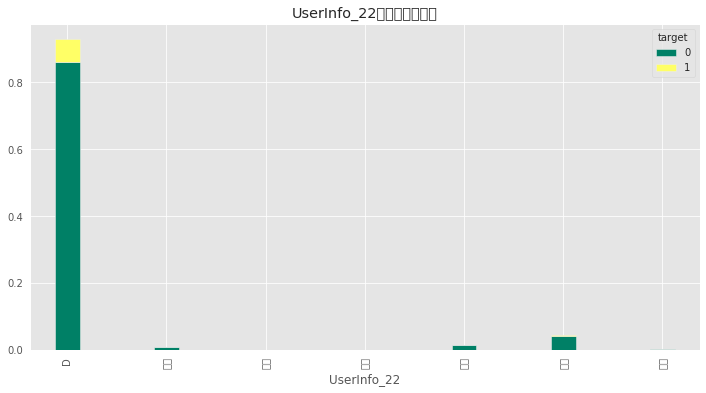

<Figure size 432x288 with 0 Axes>

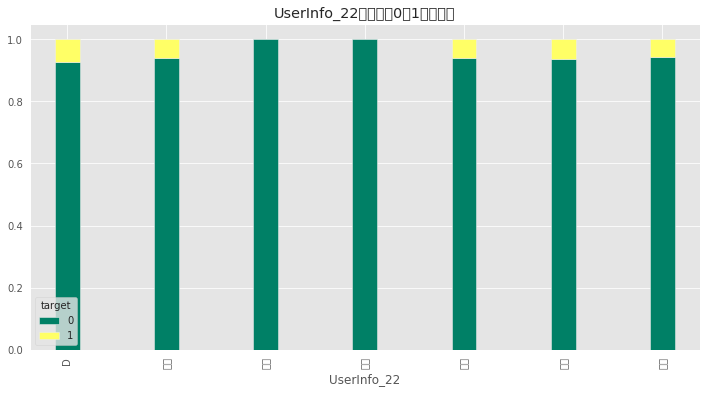

<Figure size 432x288 with 0 Axes>

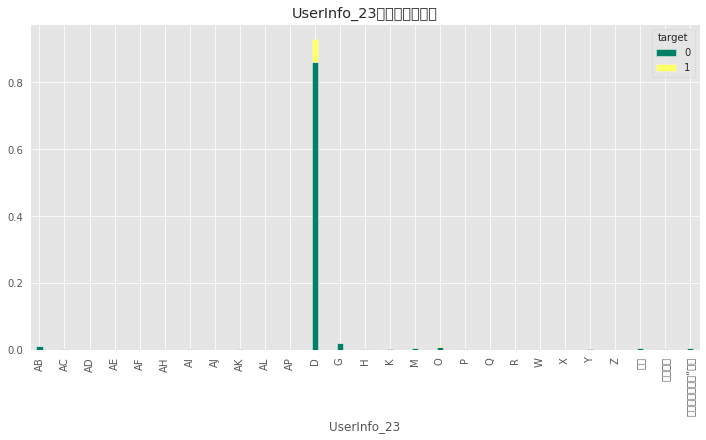

<Figure size 432x288 with 0 Axes>

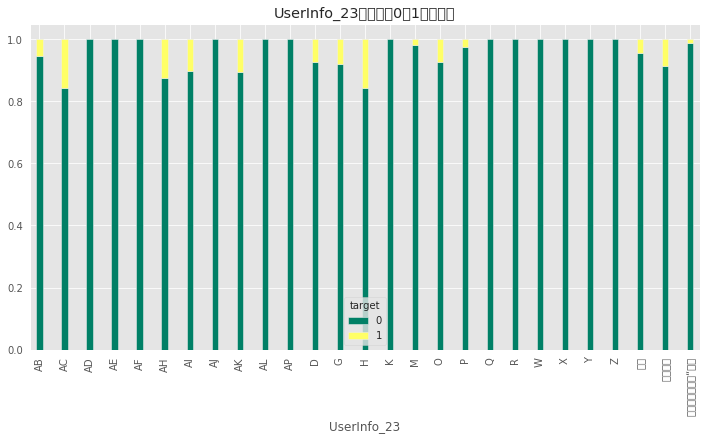

In [29]:
'''
3.3.1.2 UserInfo22、23特征分析:
通过可视化展示可知:
这两个特征中，‘D’占比都非常高，超过90%
'''
# 创建列表userlist，存储UserInfo_22、23两个特征名称
userlist = ['UserInfo_22', 'UserInfo_23']
# 利用figures_in_featurelist函数可视化UserInfo_22、23两个特征的类别分布
figures_in_featurelist(featurelist=userlist, name='userinfo_')

In [30]:
'''
3.3.1.2 UserInfo24特征分析:
通过对UserInfo_24特征按照类别进行分组，使用value_counts方法分别统计每个类别中0和1的数量,统计结果:

'''
# 利用groupby方法将UserInfo_24特征按照类别进行分组，value_counts方法分别统计每个类别中0和1的数量，将结果存入userinfo_24内
userinfo_24 = data.groupby(by='UserInfo_24')['target'].value_counts().unstack()
# 展示UserInfo_24内类别数量
print('UserInfo_24特征的类别数量是:{}'.format(len(data['UserInfo_24'].unique())))
# 展示结果
userinfo_24.head(20)


UserInfo_24特征的类别数量是:1963


target,0,1
UserInfo_24,,
D,25802.000,2065.000
万福镇象山村,1.000,nan
万通城5幢401,1.000,nan
上海市嘉定区嘉定镇,1.000,nan
上海市奉贤区四团镇,1.000,nan
上海市奉贤区庄行镇,1.000,nan
上海市宝山区,1.000,nan
上海市徐汇区,1.000,nan
上海市普陀区,1.000,nan


<Figure size 432x288 with 0 Axes>

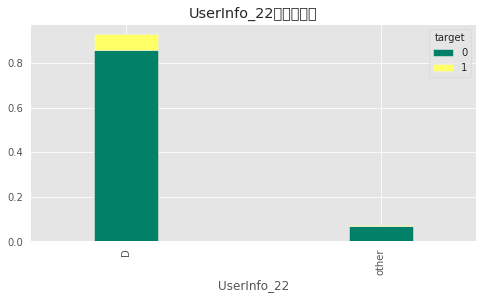

<Figure size 432x288 with 0 Axes>

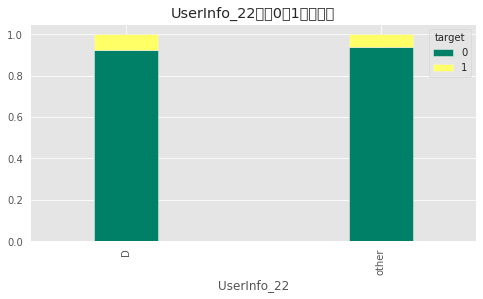

<Figure size 432x288 with 0 Axes>

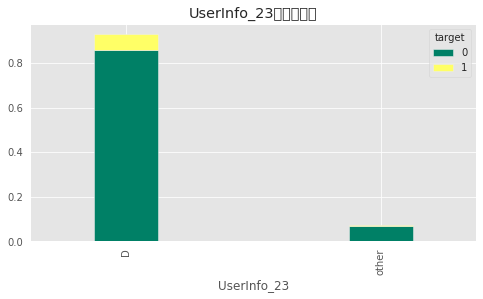

<Figure size 432x288 with 0 Axes>

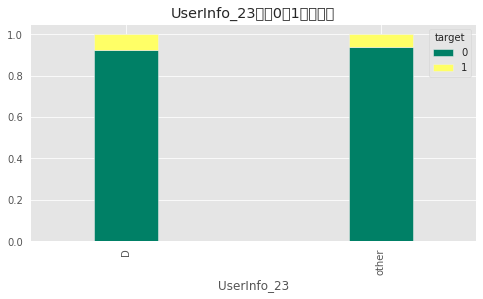

<Figure size 432x288 with 0 Axes>

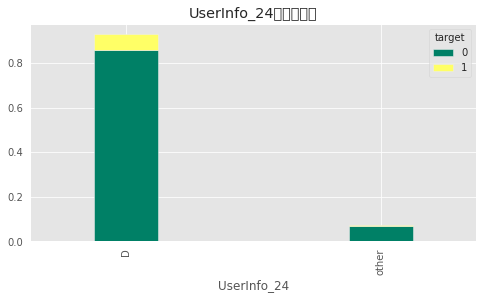

<Figure size 432x288 with 0 Axes>

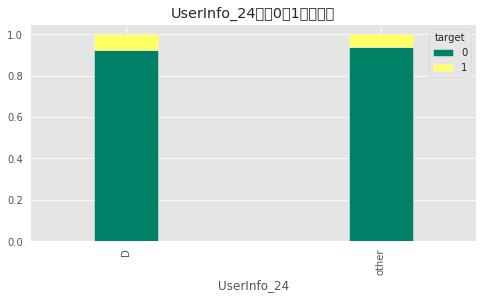

In [31]:
'''
3.3.1.2 统计结果:
UserInfo_24:
(1) 特征共有1963个类别
(2) D类别总数超过27000+，占比超过90%，占比过大
(3) 除去D类别，其余的1962个类别的数量只有不超过3000个，平均每个类别的数量不超过2个
(4) 考虑到该特征中类别过多(一个特征有1900+个类别)，某一个类别的数量占比过大(超过90%)，并且其他类别数量少，类别多，因此
    做合并处理，D视为一类，其他所有类别视为另外一类
UserInfo_22、23:
由于UserInfo_22、23同样存在D类别占比超过90%，其余特征占比过低的情况，同样对这两个特征进行转换
    
特征处理结果:
特征处理后的UserInfo_24可视化结果:‘D’中0的比例略低于other
'''
# 利用numpy的where方法，处理UserInfo_22数据：‘D’类别保持不变，其他类别全部设为‘other’
data['UserInfo_22'] = np.where(data['UserInfo_22']=='D', 'D', 'other')
# 对处理后的UserInfo_22特征进行分类统计0和1的标签，并将数据存入userinfo_22
userinfo_22 = data.groupby(by='UserInfo_22')['target'].value_counts().unstack()
# 使用category_proportion_figure函数对处理后的特征可视化
category_proportion_figure(plot_data=userinfo_22, figsize=(8,4), title='UserInfo_22个类别占比')
# 使用target_proportion_figure函数对处理后的特征可视化
target_proportion_figure(plot_data=userinfo_22, figsize=(8,4), title='UserInfo_22特征0和1标签占比')

# 利用numpy的where方法，处理UserInfo_23数据：‘D’类别保持不变，其他类别全部设为‘other’
data['UserInfo_23'] = np.where(data['UserInfo_23']=='D', 'D', 'other')
# 对处理后的UserInfo_23特征进行分类统计0和1的标签，并将数据存入userinfo_23
userinfo_23= data.groupby(by='UserInfo_23')['target'].value_counts().unstack()
# 使用category_proportion_figure函数对处理后的特征可视化
category_proportion_figure(plot_data=userinfo_23, figsize=(8,4), title='UserInfo_23个类别占比')
# 使用target_proportion_figure函数对处理后的特征可视化
target_proportion_figure(plot_data=userinfo_23, figsize=(8,4), title='UserInfo_23特征0和1标签占比')

# 利用numpy的where方法，处理UserInfo_24数据：‘D’类别保持不变，其他类别全部设为‘other’
data['UserInfo_24'] = np.where(data['UserInfo_24']=='D', 'D', 'other')
# 对处理后的UserInfo_24特征进行分类统计0和1的标签，并将数据存入userinfo_24
userinfo_24 = data.groupby(by='UserInfo_24')['target'].value_counts().unstack()
# 使用category_proportion_figure函数对处理后的特征可视化
category_proportion_figure(plot_data=userinfo_24, figsize=(8,4), title='UserInfo_24个类别占比')
# 使用target_proportion_figure函数对处理后的特征可视化
target_proportion_figure(plot_data=userinfo_24, figsize=(8,4), title='UserInfo_24特征0和1标签占比')

UserInfo_2、4、7、8、19、20全部为地理位置信息,测试只保留 UserInfo_7

In [32]:
data.drop(['UserInfo_2','UserInfo_4','UserInfo_8','UserInfo_19','UserInfo_20'], axis=1, inplace=True)
data.head()

,target,UserInfo_1,UserInfo_3,UserInfo_5,UserInfo_6,UserInfo_7,UserInfo_9,UserInfo_10,UserInfo_14,UserInfo_15,UserInfo_16,UserInfo_17,UserInfo_18,UserInfo_21,UserInfo_22,UserInfo_23,UserInfo_24,Education_Info1,Education_Info2,Education_Info3,Education_Info4,Education_Info5,Education_Info6,Education_Info7,Education_Info8,ListingInfo
Idx,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,0,1.000,4.000,2,2,广东,中国移动,0,2,2,1,1,29,0,D,D,D,0,E,E,E,0,E,E,E,2014/3/5
10002,0,1.000,4.000,2,2,浙江,中国移动,1,3,3,2,2,28,0,D,D,D,0,E,E,E,0,E,E,E,2014/2/26
10003,0,1.000,3.000,2,2,湖北,中国电信,0,4,4,2,1,32,0,D,D,D,0,E,E,E,0,E,E,E,2014/2/28
10006,0,4.000,1.000,2,2,福建,中国移动,0,2,2,1,1,33,0,D,D,D,0,E,E,E,0,E,E,E,2014/2/25
10007,0,5.000,1.000,2,2,辽宁,中国移动,0,3,3,1,1,43,0,D,D,D,0,E,E,E,0,E,E,E,2014/2/27


In [34]:
'''
3.3.1.3 UserInfo_2、4、7、8、19、20特征分析:
1、以上6个特征全部为地理位置信息
2、UserInfo_2、4、8、20为城市信息，7、19为省份信息
3、数据内‘广东’、‘广东省’和‘北京’、‘北京市’含义相同，需要做数据处理
4、对于城市信息:
4.1、对一些‘奇怪的城市’修正为标准名称(绝大多数都是少数民族地区)
4.2、添加城市等级分类(1线、2线等)特征
4.3、添加每个城市的经纬度信息特征，实现把城市信息从300+类别型特征转换为连续型数值特征
4.4、添加城市之间距离特征
5、对于省份信息:
5.1、添加新特征，对两个省份特征比较，类别为‘相同’和‘不同’
5.2、对各省份按照地区(东北、华北、西北等)分类,将30+的类别信息转换成8个类别的信息
'''

'''
3.3.1.3.1:数据清洗:
清洗UserInfo_8内特殊符号(‘、’、‘-’、‘ ’等)
UserInfo_2、4、8、20特征内的'省'、'市'等去掉，并将一些‘奇怪的’城市名称转换为网上(国家统计局)发布的标准名称
'''
# 利用replace方法进行字符串处理，去除UserInfo_7、19内所有省份的‘省’和直辖市的‘市’
data['UserInfo_7'] = data['UserInfo_7'].str.replace('省', '')
data['UserInfo_7'] = data['UserInfo_7'].str.replace('市', '')

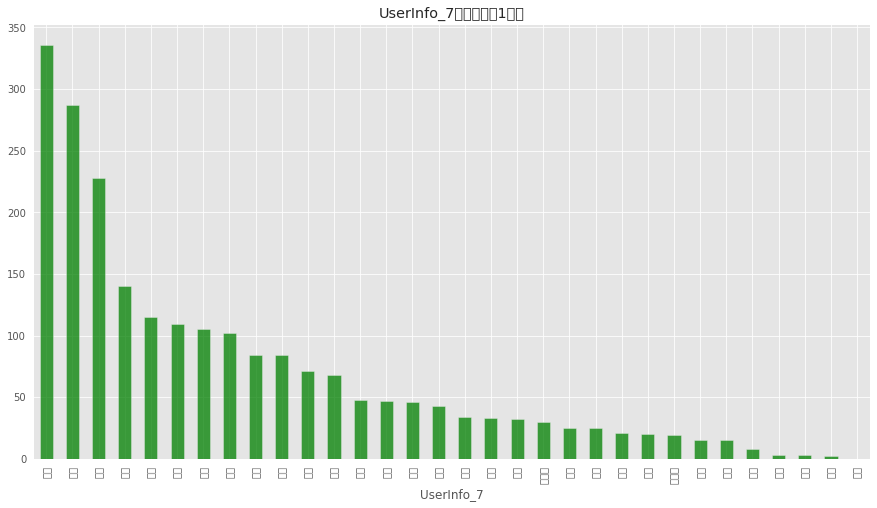

In [37]:
'''
3.3.1.3.2:省份信息分析-UserInfo_7

可视化UserInfo_7省份特征中标签1(逾期)的各省份数量:
(1) 不详(这里把不详也视为一个‘省份’)、广东、山东、江苏、浙江、四川、福建、湖南这8个省份中标签1的数量高于100
(2) 将以上8个类别做二值化处理，并创建新特征(是否广东、是否山东)
'''
# 使用groupby方法对userinfo_7特征内每个类别按照标签进行分组，并使用value_counts方法统计数量，将结果存入userinfo_7
userinfo_7 = data.groupby(by='UserInfo_7')['target'].value_counts().unstack()
# 使用sort_values函数对userinfo_7中标签1进行排序，参数scending设为False，代表降序排列，结果存入userinfo_7_sort
userinfo_7_sort = userinfo_7[1].sort_values(ascending=False)
# 使用bar_figure函数对userinfo_7_sort可视化
bar_figure(plot_data=userinfo_7_sort, title='UserInfo_7各省份标签1数量', figsize=(15,8))
# 使用where方法对标签1的数量较多的省份(数量高于100)进行二值化处理，‘是’为1，‘不是’为0，并相应地创建新特征
data['userinfo_7_不详'] = np.where(data['UserInfo_7']=='不详', 1, 0)
data['userinfo_7_广东'] = np.where(data['UserInfo_7']=='广东', 1, 0)
data['userinfo_7_山东'] = np.where(data['UserInfo_7']=='山东', 1, 0)
data['userinfo_7_江苏'] = np.where(data['UserInfo_7']=='江苏', 1, 0)
data['userinfo_7_浙江'] = np.where(data['UserInfo_7']=='浙江', 1, 0)
data['userinfo_7_四川'] = np.where(data['UserInfo_7']=='四川', 1, 0)
data['userinfo_7_福建'] = np.where(data['UserInfo_7']=='福建', 1, 0)
data['userinfo_7_湖南'] = np.where(data['UserInfo_7']=='湖南', 1, 0)

<Figure size 432x288 with 0 Axes>

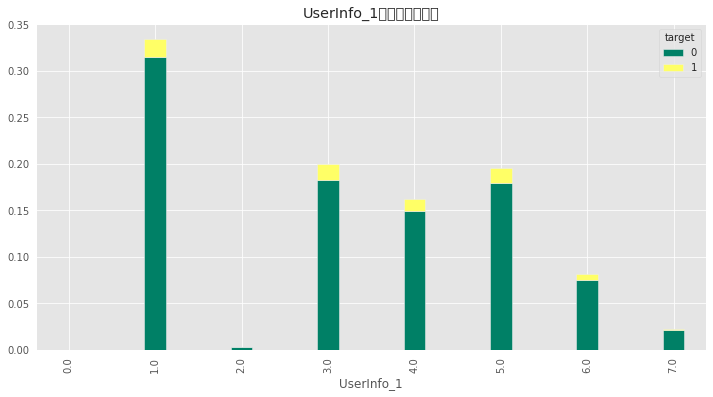

<Figure size 432x288 with 0 Axes>

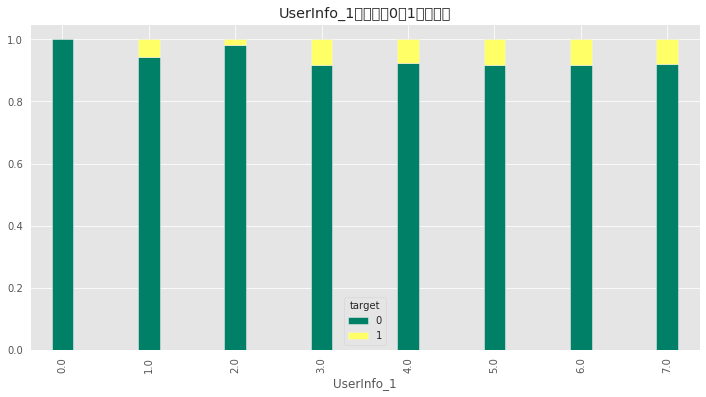

<Figure size 432x288 with 0 Axes>

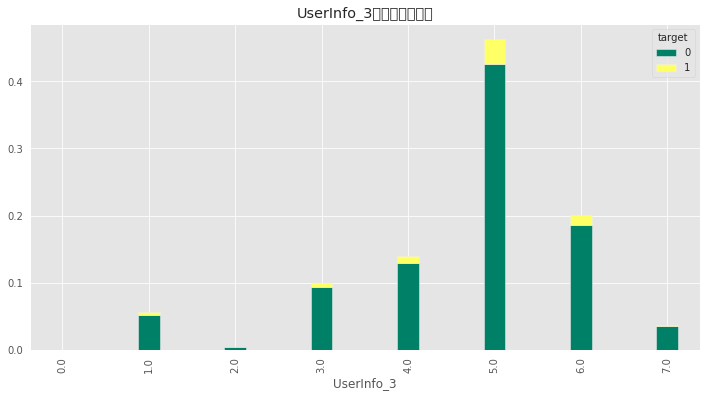

<Figure size 432x288 with 0 Axes>

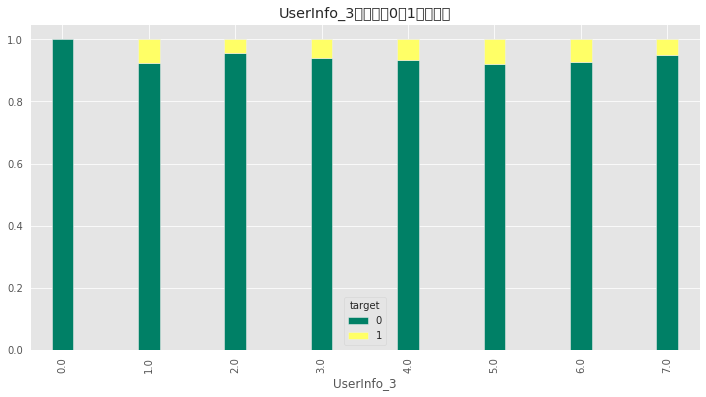

<Figure size 432x288 with 0 Axes>

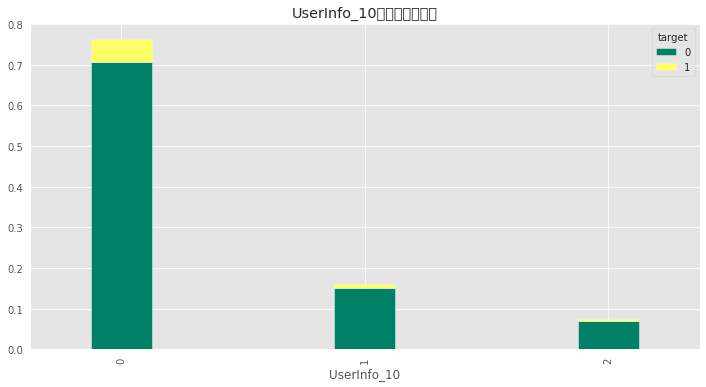

<Figure size 432x288 with 0 Axes>

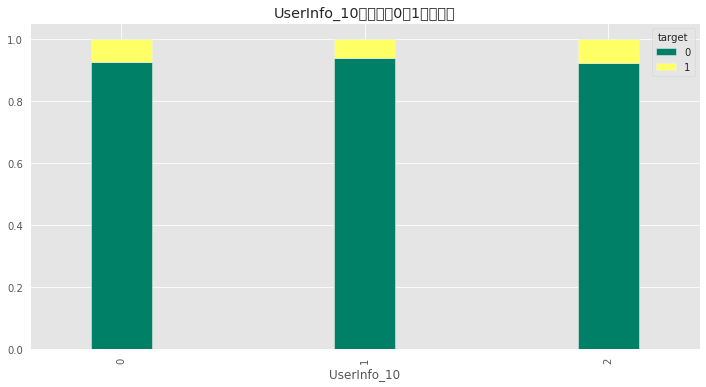

<Figure size 432x288 with 0 Axes>

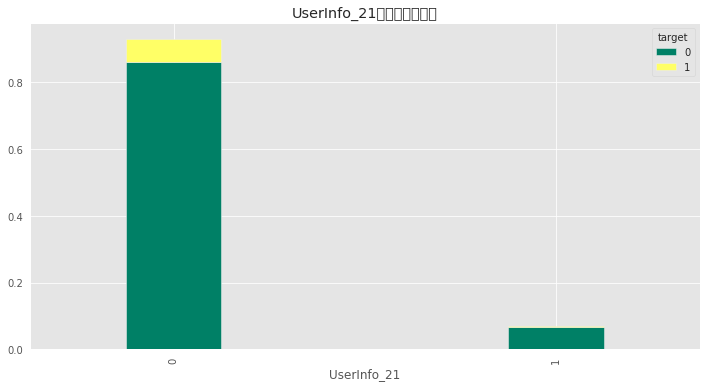

<Figure size 432x288 with 0 Axes>

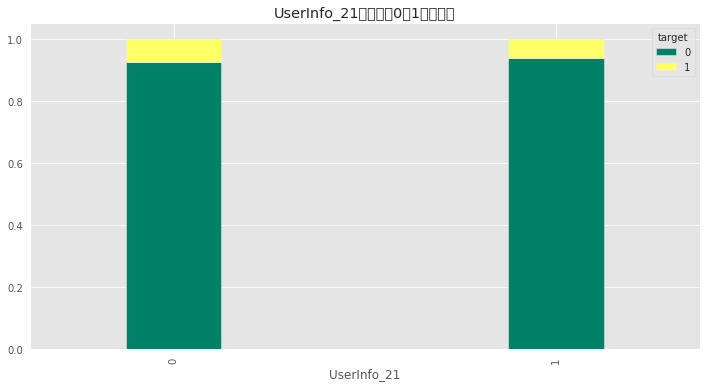

<Figure size 432x288 with 0 Axes>

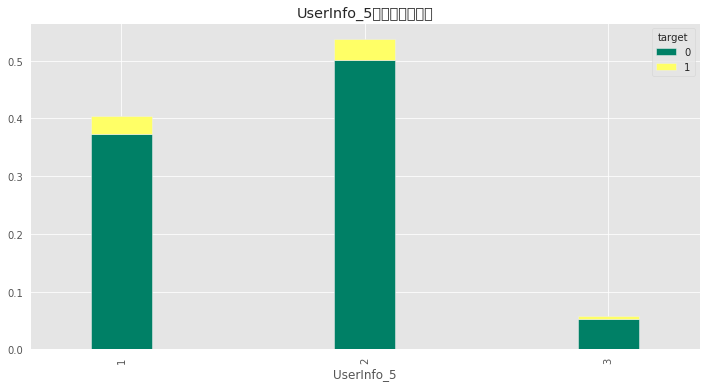

<Figure size 432x288 with 0 Axes>

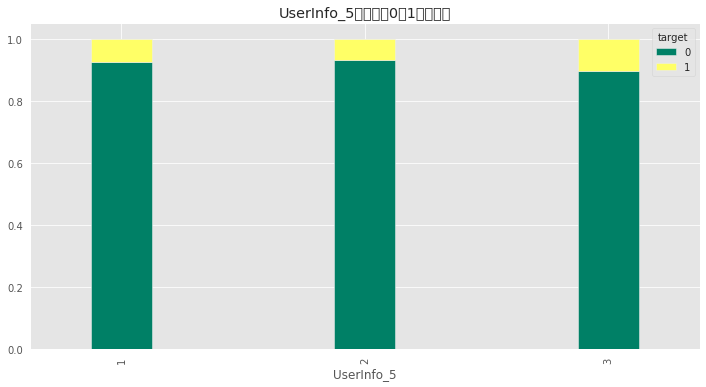

<Figure size 432x288 with 0 Axes>

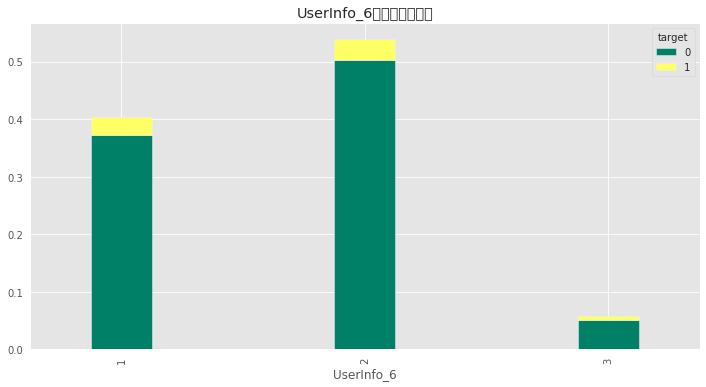

<Figure size 432x288 with 0 Axes>

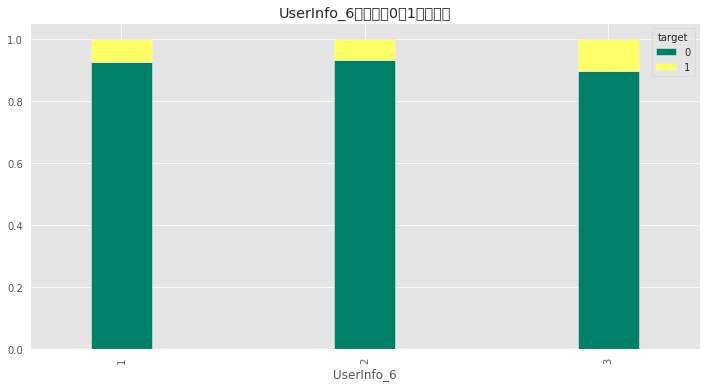

<Figure size 432x288 with 0 Axes>

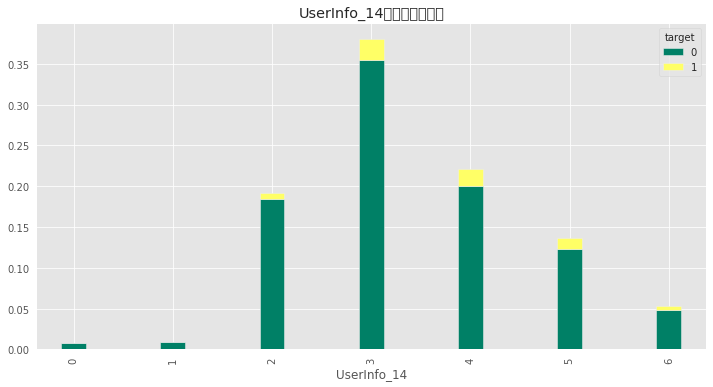

<Figure size 432x288 with 0 Axes>

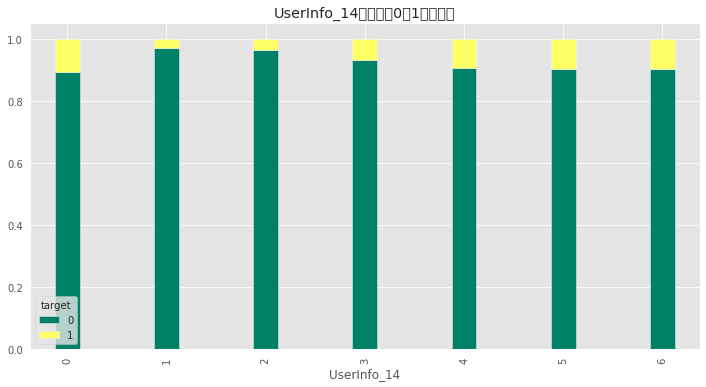

<Figure size 432x288 with 0 Axes>

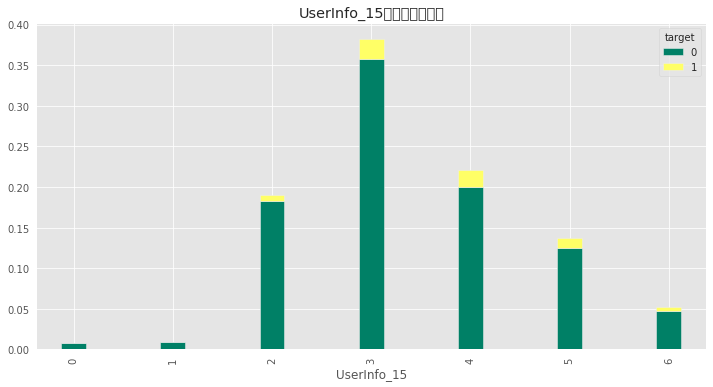

<Figure size 432x288 with 0 Axes>

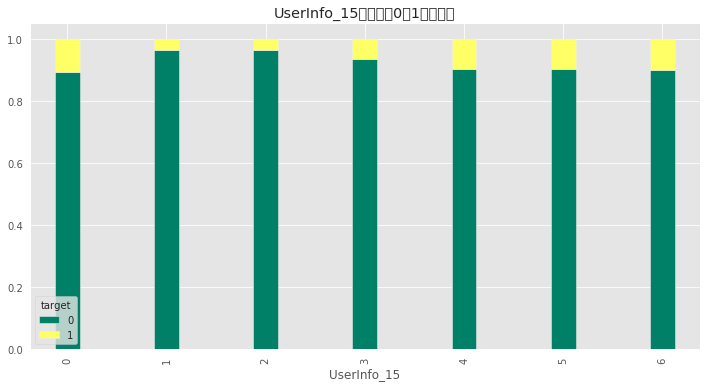

<Figure size 432x288 with 0 Axes>

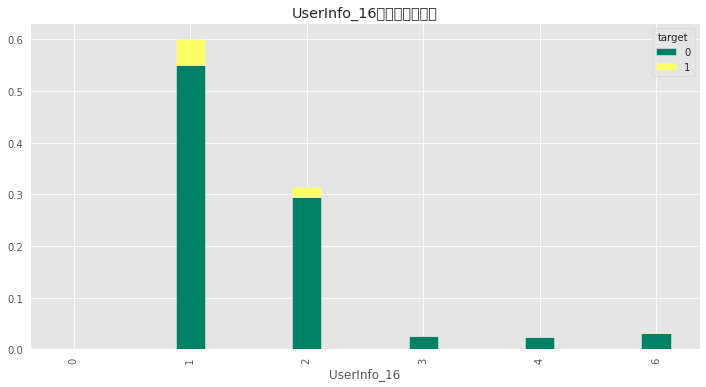

<Figure size 432x288 with 0 Axes>

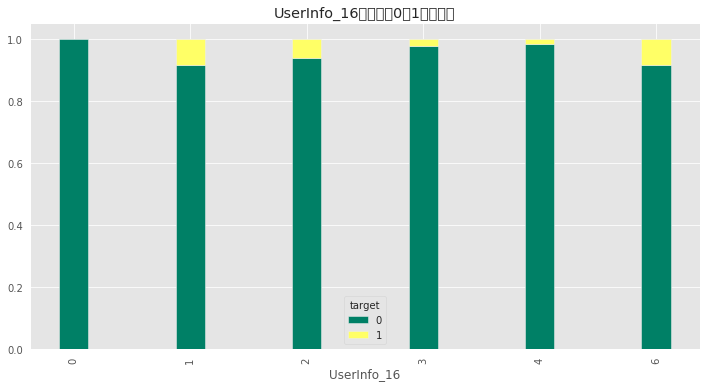

<Figure size 432x288 with 0 Axes>

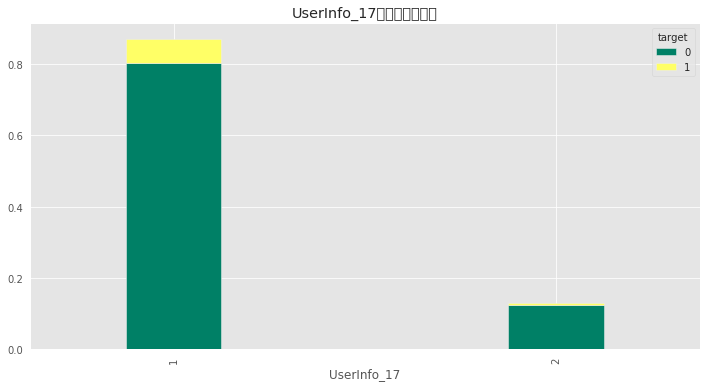

<Figure size 432x288 with 0 Axes>

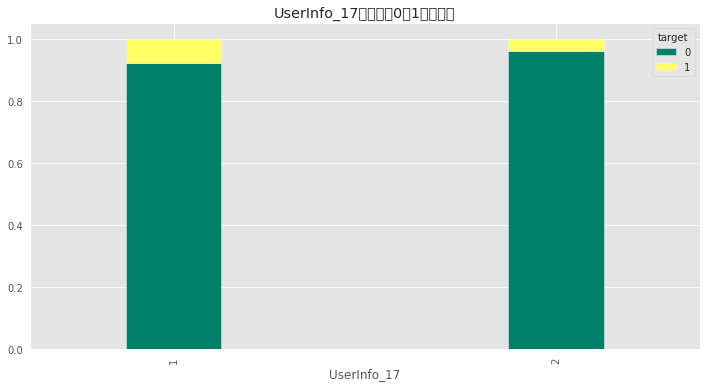

<Figure size 432x288 with 0 Axes>

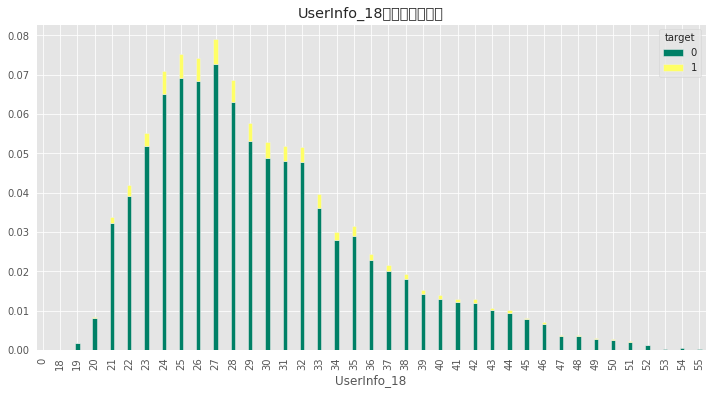

<Figure size 432x288 with 0 Axes>

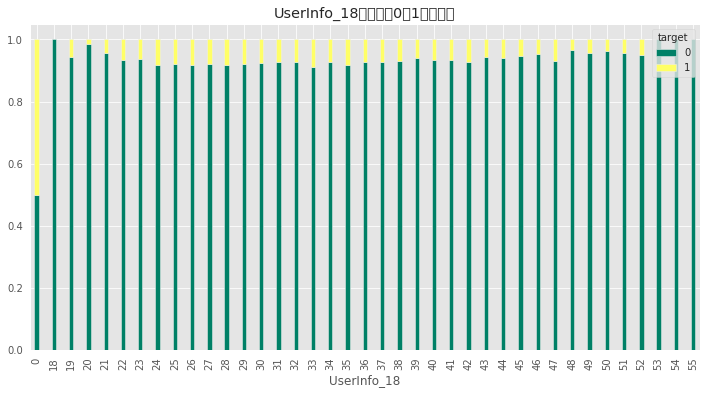

In [38]:
'''
3.3.2.1 
对于数值型特征，首先对每个特征的数值分布进行可视化展示：
'''
# 使用figures_in_featurelist函数对userinfo_numerical_list内每个数值型特征可视化处理
figures_in_featurelist(featurelist=userinfo_numerical_list, name='userinfo_')

In [40]:
'''
3.3.2.1 
通过展示结果可知:
1、UserInfo_17、UserInfo_21两个特征中分别只有2个数值，分别为0、1和1、2
2、UserInfo_5、6、10这3个特征分别有3个数值，为0、1、2和1、2、3
3、UserInfo1、3、14、15、16这5个特征中分别有6和7个数值(例如0、1、2、3、4、5、6)
4、综合1、2、3，以上的数值型特征内，每个特征中数值都不超过10个，因此将以上特征转换成类别型
5、UserInfo18特征的数值较多，共有38个数值，分布趋势明显
'''
# 由于userinfo_numerical_list内除了UserInfo_18外，剩下所有特征都需要转换成类别型，因此先在列表内去除UserInfo18
del userinfo_numerical_list[-1]
# 遍历userinfo_numerical_list每个特征名称
for i in userinfo_numerical_list:
    # 使用astype方法把特征类型转换为str
    data[i] = data[i].astype(str)

In [41]:
data.head()

,target,UserInfo_1,UserInfo_3,UserInfo_5,UserInfo_6,UserInfo_7,UserInfo_9,UserInfo_10,UserInfo_14,UserInfo_15,UserInfo_16,UserInfo_17,UserInfo_18,UserInfo_21,UserInfo_22,UserInfo_23,UserInfo_24,Education_Info1,Education_Info2,Education_Info3,Education_Info4,Education_Info5,Education_Info6,Education_Info7,Education_Info8,ListingInfo,userinfo_7_不详,userinfo_7_广东,userinfo_7_山东,userinfo_7_江苏,userinfo_7_浙江,userinfo_7_四川,userinfo_7_福建,userinfo_7_湖南
Idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,0,1.0,4.0,2,2,广东,中国移动,0,2,2,1,1,29,0,D,D,D,0,E,E,E,0,E,E,E,2014/3/5,0,1,0,0,0,0,0,0
10002,0,1.0,4.0,2,2,浙江,中国移动,1,3,3,2,2,28,0,D,D,D,0,E,E,E,0,E,E,E,2014/2/26,0,0,0,0,1,0,0,0
10003,0,1.0,3.0,2,2,湖北,中国电信,0,4,4,2,1,32,0,D,D,D,0,E,E,E,0,E,E,E,2014/2/28,0,0,0,0,0,0,0,0
10006,0,4.0,1.0,2,2,福建,中国移动,0,2,2,1,1,33,0,D,D,D,0,E,E,E,0,E,E,E,2014/2/25,0,0,0,0,0,0,1,0
10007,0,5.0,1.0,2,2,辽宁,中国移动,0,3,3,1,1,43,0,D,D,D,0,E,E,E,0,E,E,E,2014/2/27,0,0,0,0,0,0,0,0


In [42]:
'''
3.4 特征处理
(1) 将UserInfo特征内，所有类别型特征进行独热编码转换
(2) 删除原有的地理位置特征
'''
# 使用drop方法删除地理位置信息的原始特征
#df_dataset.drop(userinfo_location_list, axis=1, inplace=True)
# drop UserInfo_7
data.drop(['UserInfo_7'], axis=1, inplace=True)
# 创建user_dummies_list，存储需要进行独热编码转换的特征名
user_dummies_list = ['UserInfo_1', 'UserInfo_3', 'UserInfo_5', 'UserInfo_6', 
                     'UserInfo_9', 'UserInfo_10', 'UserInfo_14', 
                     'UserInfo_15', 'UserInfo_16', 'UserInfo_17', 'UserInfo_21', 
                     'UserInfo_22', 'UserInfo_23', 'UserInfo_24']
# 使用get_dummies进行独热编码转换
data = pd.get_dummies(data, columns=user_dummies_list)
# 展示结果
data.head()

,target,UserInfo_18,Education_Info1,Education_Info2,Education_Info3,Education_Info4,Education_Info5,Education_Info6,Education_Info7,Education_Info8,ListingInfo,userinfo_7_不详,userinfo_7_广东,userinfo_7_山东,userinfo_7_江苏,userinfo_7_浙江,userinfo_7_四川,userinfo_7_福建,userinfo_7_湖南,UserInfo_1_0.0,UserInfo_1_1.0,UserInfo_1_2.0,UserInfo_1_3.0,UserInfo_1_4.0,UserInfo_1_5.0,UserInfo_1_6.0,UserInfo_1_7.0,UserInfo_3_0.0,UserInfo_3_1.0,UserInfo_3_2.0,UserInfo_3_3.0,UserInfo_3_4.0,UserInfo_3_5.0,UserInfo_3_6.0,UserInfo_3_7.0,UserInfo_5_1,UserInfo_5_2,UserInfo_5_3,UserInfo_6_1,UserInfo_6_2,UserInfo_6_3,UserInfo_9_不详,UserInfo_9_中国电信,UserInfo_9_中国移动,UserInfo_9_中国联通,UserInfo_10_0,UserInfo_10_1,UserInfo_10_2,UserInfo_14_0,UserInfo_14_1,UserInfo_14_2,UserInfo_14_3,UserInfo_14_4,UserInfo_14_5,UserInfo_14_6,UserInfo_15_0,UserInfo_15_1,UserInfo_15_2,UserInfo_15_3,UserInfo_15_4,UserInfo_15_5,UserInfo_15_6,UserInfo_16_0,UserInfo_16_1,UserInfo_16_2,UserInfo_16_3,UserInfo_16_4,UserInfo_16_6,UserInfo_17_1,UserInfo_17_2,UserInfo_21_0,UserInfo_21_1,UserInfo_22_D,UserInfo_22_other,UserInfo_23_D,UserInfo_23_other,UserInfo_24_D,UserInfo_24_other
Idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,0,29,0,E,E,E,0,E,E,E,2014/3/5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
10002,0,28,0,E,E,E,0,E,E,E,2014/2/26,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0
10003,0,32,0,E,E,E,0,E,E,E,2014/2/28,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
10006,0,33,0,E,E,E,0,E,E,E,2014/2/25,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
10007,0,43,0,E,E,E,0,E,E,E,2014/2/27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0


In [43]:
'''
5、Education_Info特征数据处理:

5.1、查看Education_Info数据总体情况
Education_Info共有8个特征，其中Education_Info1、5为数值型特征，其他为类别型特征
'''
# 创建education_numerical_list，存储Education_Info数值型特征名称
education_numerical_list = ['Education_Info1', 'Education_Info5']
# 创建education_category_list，存储Education_Info类别型特征
education_category_list = []
# 使用feature_list函数，创建Education_Info2-4特征名称，并将结果合并入education_category_list内
education_category_list.extend(feature_list('Education_Info', 2, 4))
# 使用feature_list函数，创建Education_Info6-8特征名称，并将结果合并入education_category_list内
education_category_list.extend(feature_list('Education_Info', 6, 8))

<Figure size 432x288 with 0 Axes>

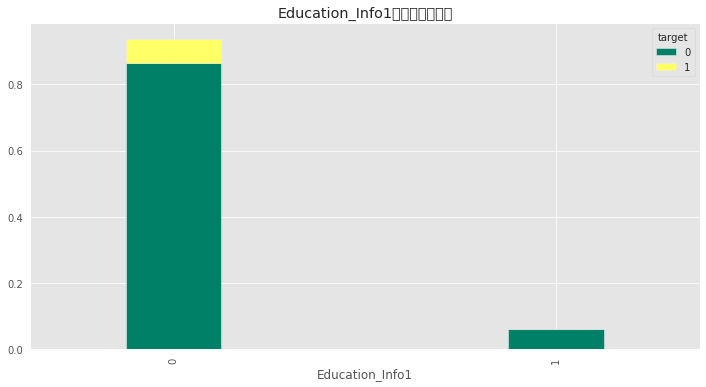

<Figure size 432x288 with 0 Axes>

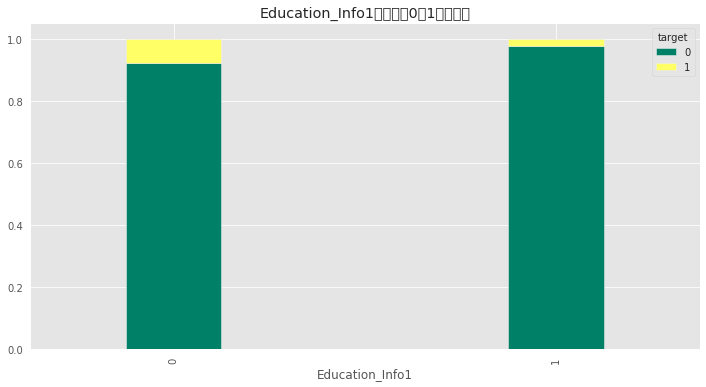

<Figure size 432x288 with 0 Axes>

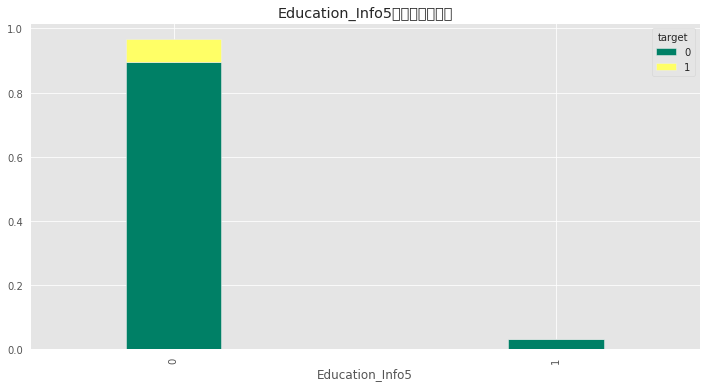

<Figure size 432x288 with 0 Axes>

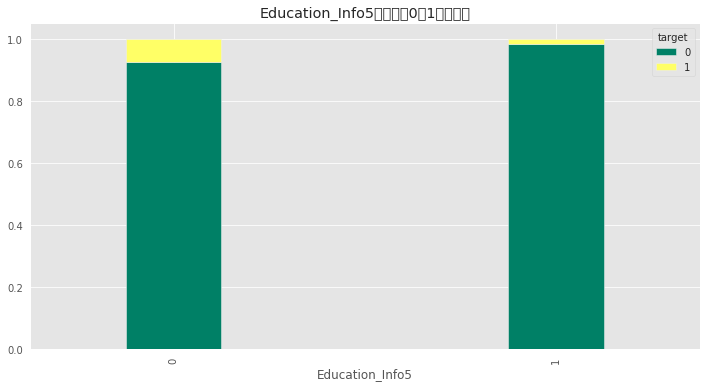

<Figure size 432x288 with 0 Axes>

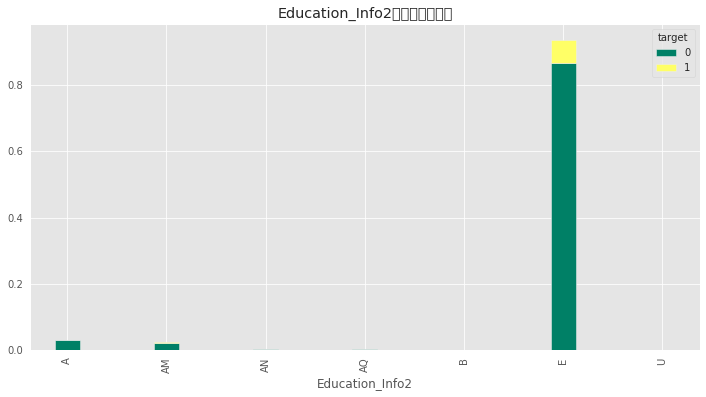

<Figure size 432x288 with 0 Axes>

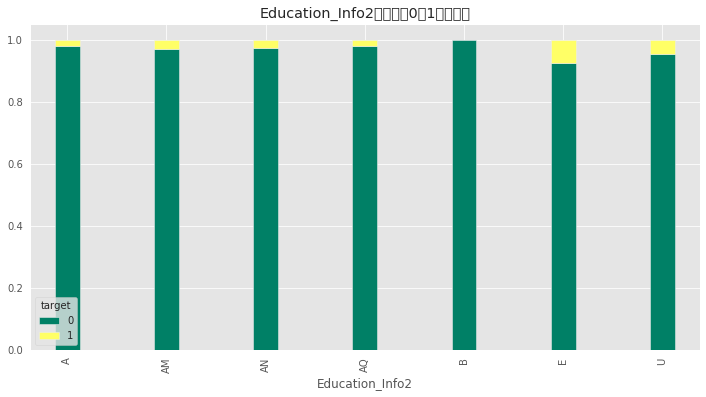

<Figure size 432x288 with 0 Axes>

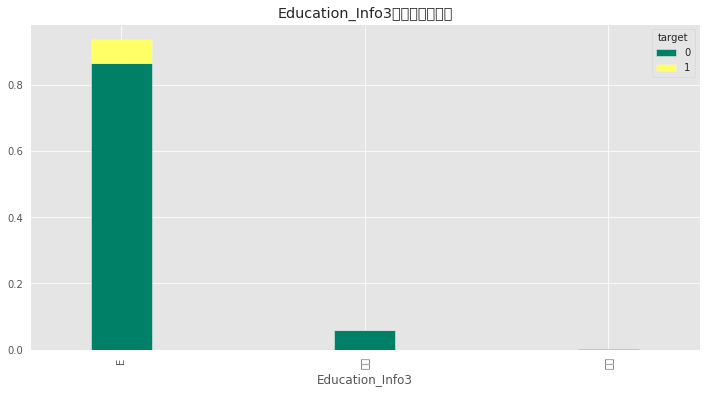

<Figure size 432x288 with 0 Axes>

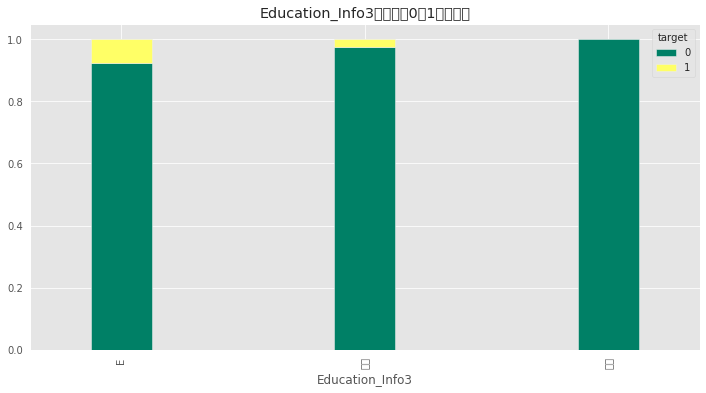

<Figure size 432x288 with 0 Axes>

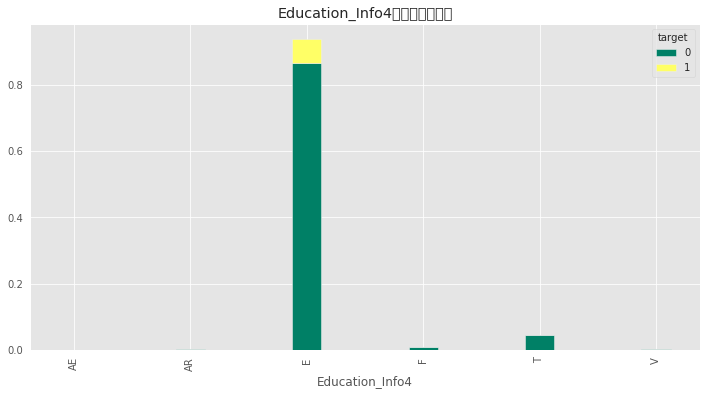

<Figure size 432x288 with 0 Axes>

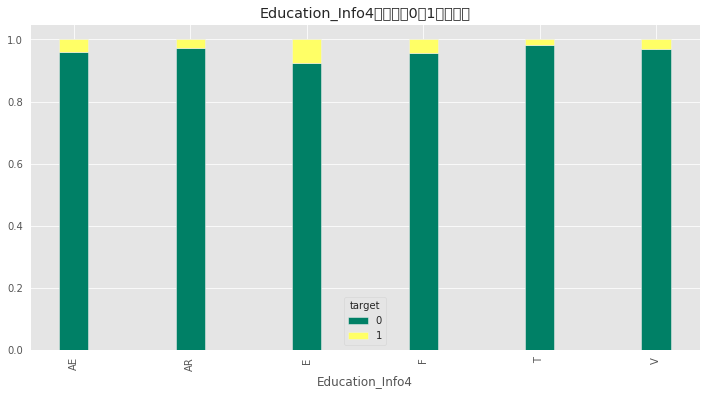

<Figure size 432x288 with 0 Axes>

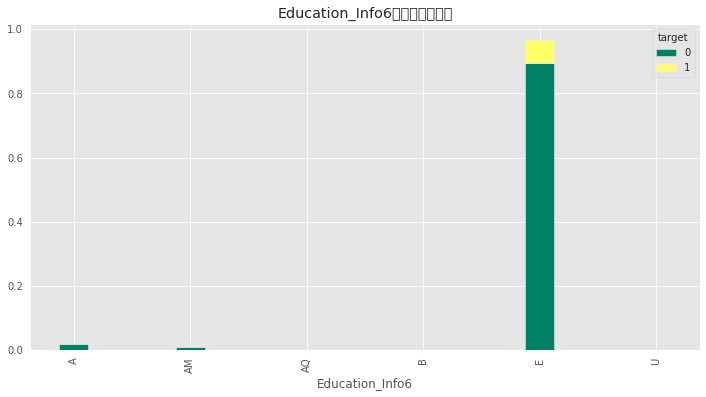

<Figure size 432x288 with 0 Axes>

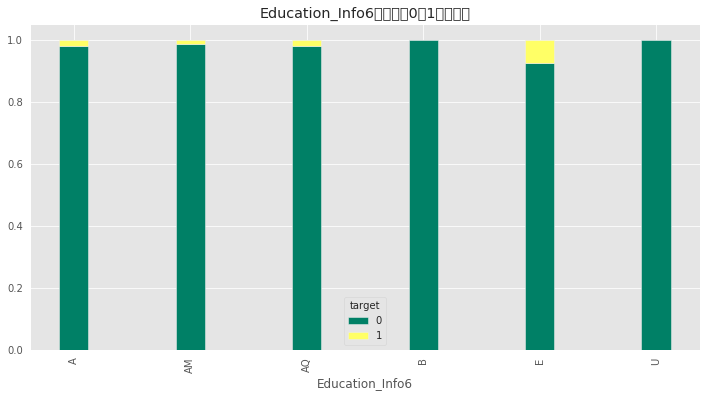

<Figure size 432x288 with 0 Axes>

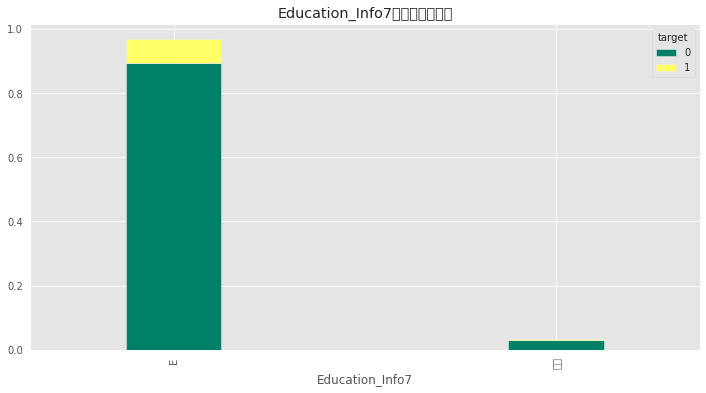

<Figure size 432x288 with 0 Axes>

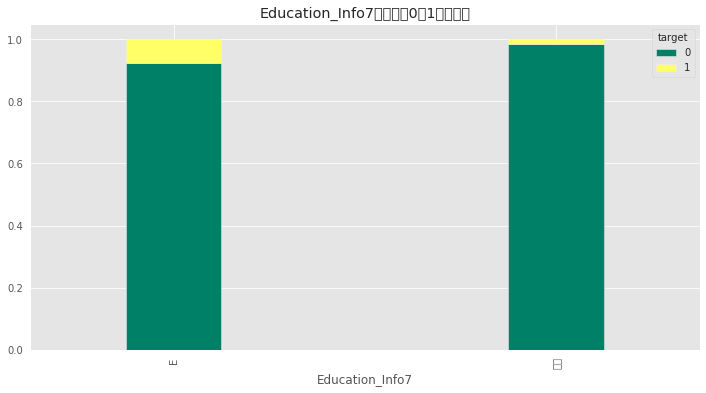

<Figure size 432x288 with 0 Axes>

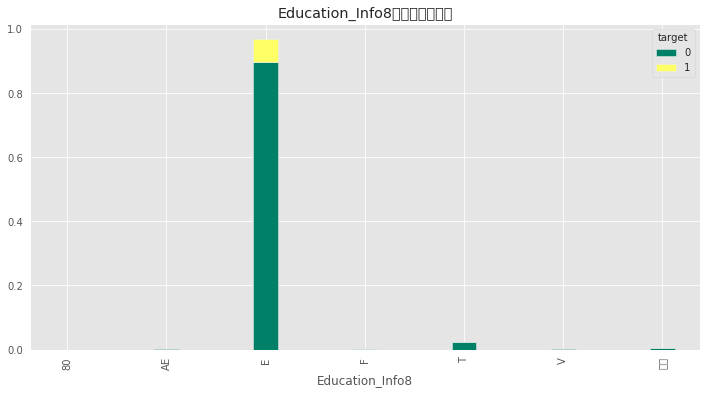

<Figure size 432x288 with 0 Axes>

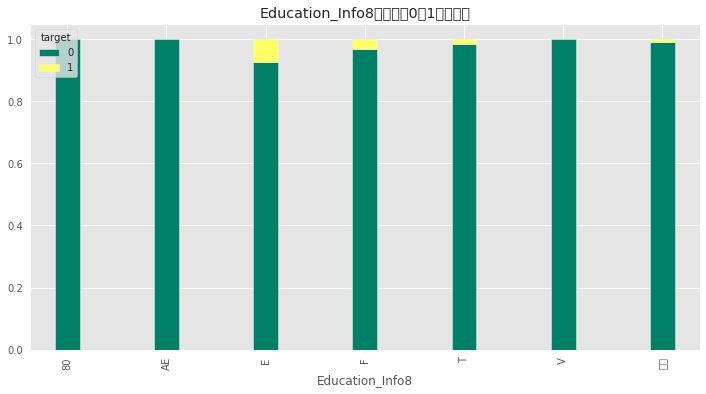

In [44]:
'''
5.2、可视化Education_Info数据总体情况
'''
# 使用figures_in_featurelist函数可视化Education_Info数值型特征分布
figures_in_featurelist(featurelist=education_numerical_list, name='education_')
# 使用figures_in_featurelist函数可视化Education_Info类别型特征分布
figures_in_featurelist(featurelist=education_category_list, name='education_')

In [45]:
'''
5.3、数值型特征处理
通过可视化结果，由于两个数值型特征里都是只有0和1两个数值，将它们转换为类别型
'''
# 遍历education_numerical_list内每个数值型特征名称
for feature in education_numerical_list:
    # 将特征类型转换为类别型
    data[feature] = data[feature].astype(str)

In [47]:
# 创建函数category_combine，对每个特征内比例低于0.01的类别进行合并
def category_combine(featurelist):
    '''
    该函数功能是对每个特征内比例低于0.01的类别进行合并
    feature_list:代表存储特征的列表    
    '''
    # 遍历feature_list内所有特征
    for i in featurelist:
        # 创建变量名，为webloginfo_+特征名后缀数字(例如webloginfo_19)
        weblog_name = 'webloginfo_' + i.split('_')[1]
        # 使用value_counts()方法对特征i内每个类别进行数量统计
        weblog_name = data[i].value_counts()
        # 计算每个类别的数量比例，并存入weblog_name内
        weblog_name = weblog_name / len(data)
        # 创建字典dic_webloginfo，存储类别-比例对应关系信息
        dic_webloginfo = {}
        # 遍历特征i内每个类别
        for j in weblog_name.index:
            # 判定条件：类别所对应的比例高于0.01
            if weblog_name[j] > 0.01:
            # 此时类别名称保持不变，并存入dic_webloginfo内，键和值都为原类别名
                dic_webloginfo[j] = j
            # 判定条件：类别所对应的比例低于0.01       
            else:
            # 此时将类别名称变为‘other’，并存入dic_webloginfo内，键为原类别名，值为变换后的类别名
                dic_webloginfo[j] = 'other'    
        # 使用map方法将特征i内各类别与dic_webloginfo进行匹配
        data[i] = data[i].map( dic_webloginfo)
    # 利用figures_in_featurelist函数重新对feature_list内处理后的特征进行可视化展示
    figures_in_featurelist(featurelist=featurelist, name='WeblogInfo_')

<Figure size 432x288 with 0 Axes>

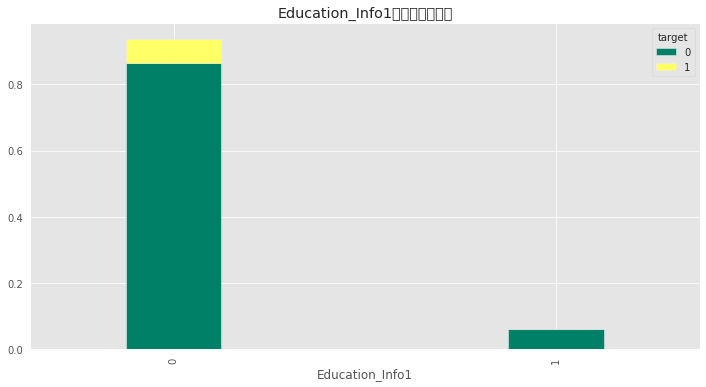

<Figure size 432x288 with 0 Axes>

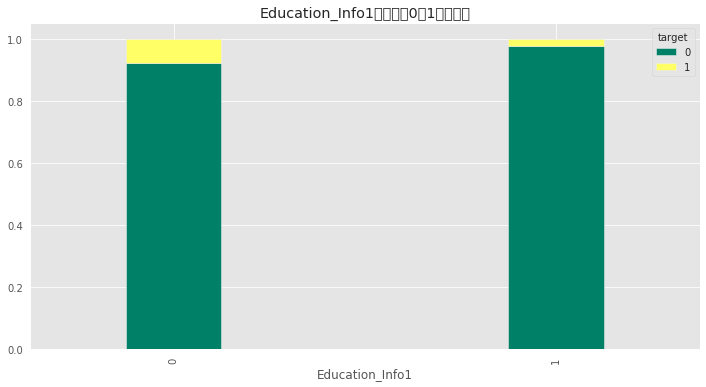

<Figure size 432x288 with 0 Axes>

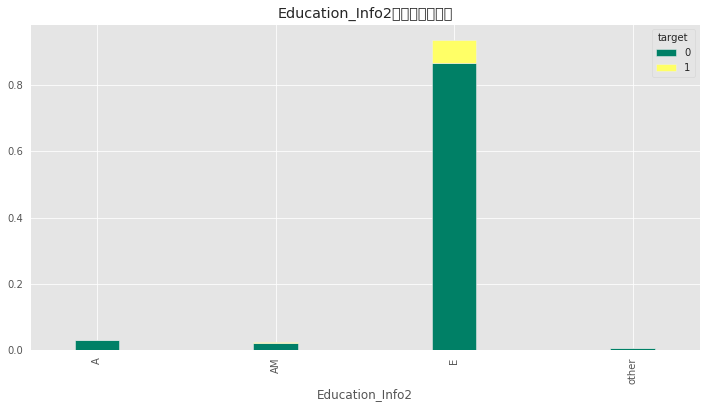

<Figure size 432x288 with 0 Axes>

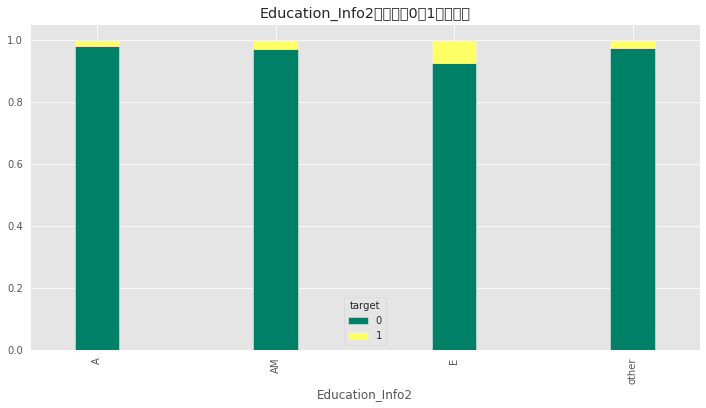

<Figure size 432x288 with 0 Axes>

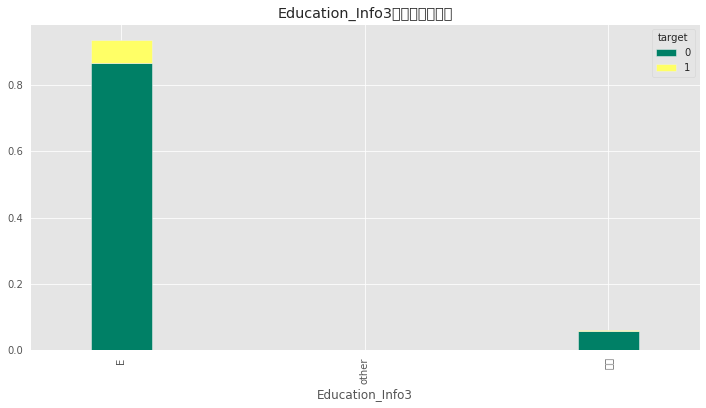

<Figure size 432x288 with 0 Axes>

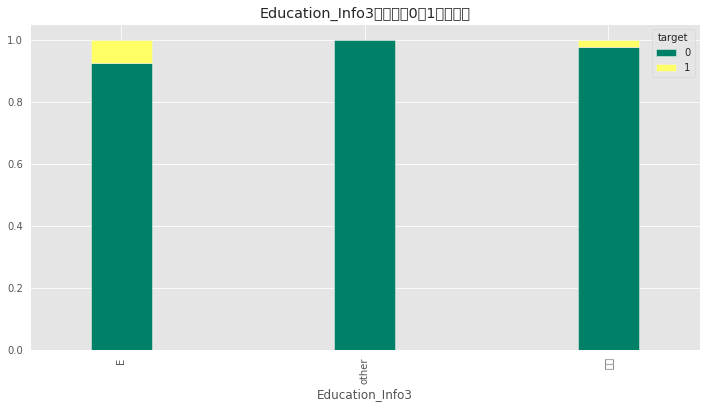

<Figure size 432x288 with 0 Axes>

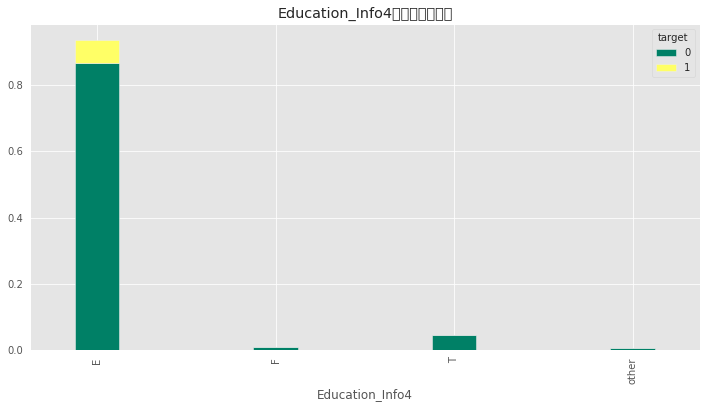

<Figure size 432x288 with 0 Axes>

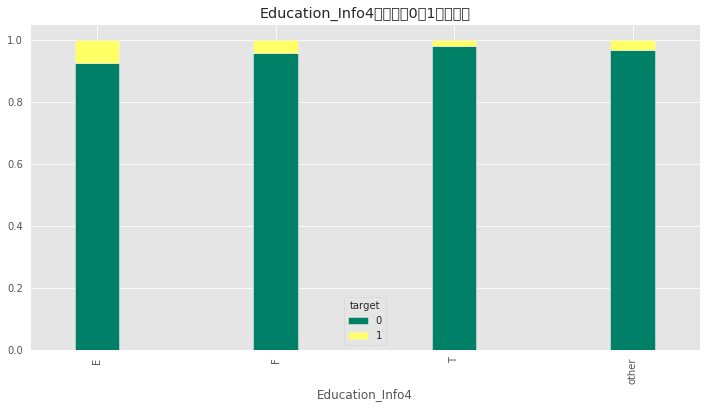

<Figure size 432x288 with 0 Axes>

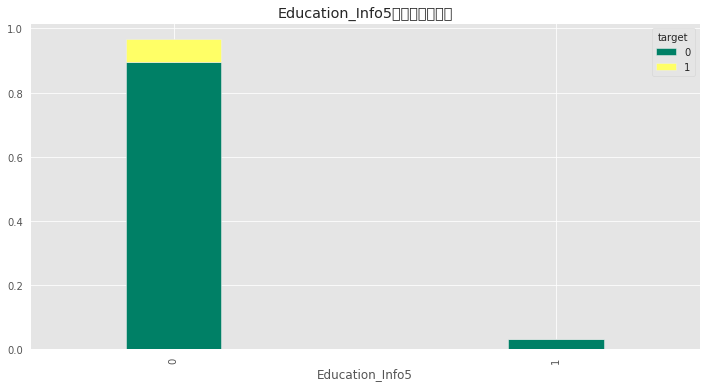

<Figure size 432x288 with 0 Axes>

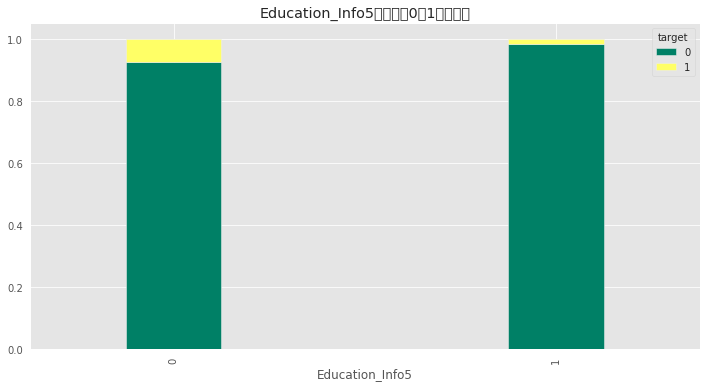

<Figure size 432x288 with 0 Axes>

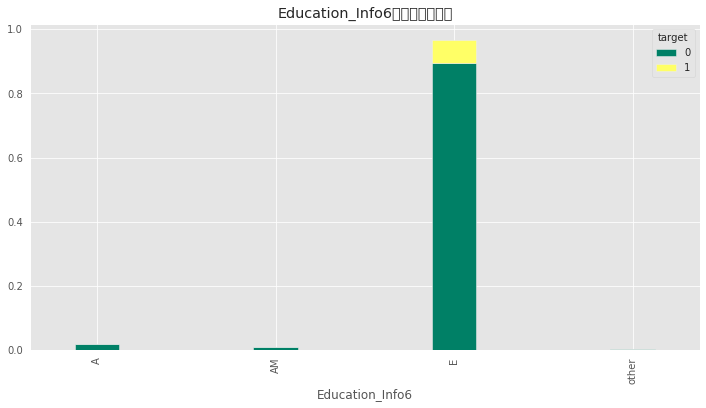

<Figure size 432x288 with 0 Axes>

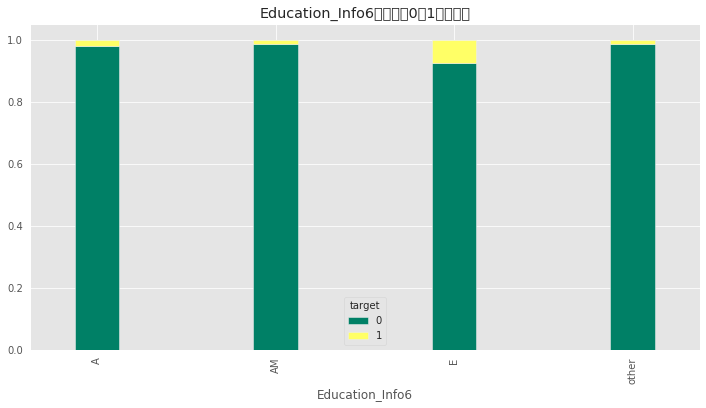

<Figure size 432x288 with 0 Axes>

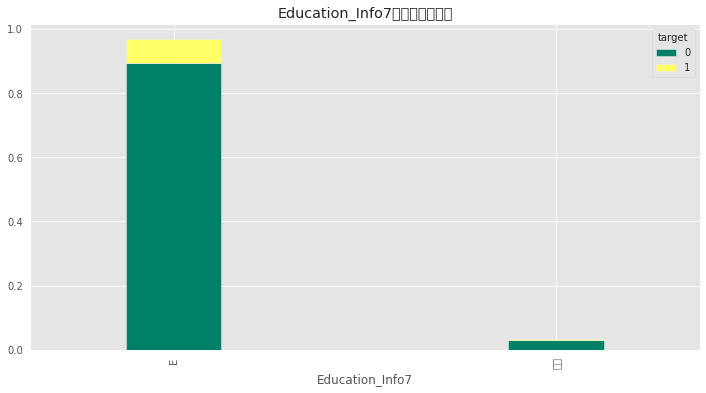

<Figure size 432x288 with 0 Axes>

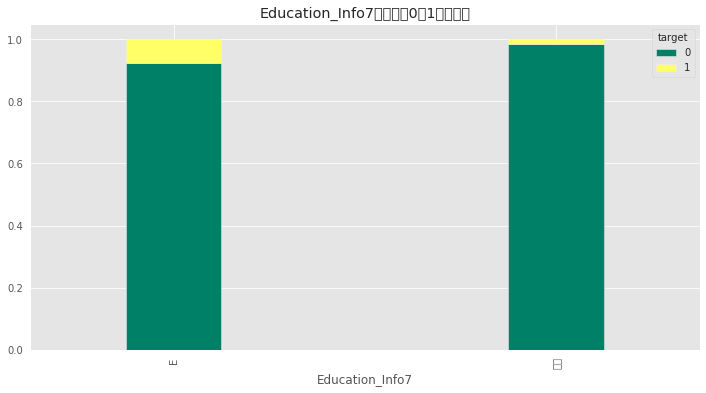

<Figure size 432x288 with 0 Axes>

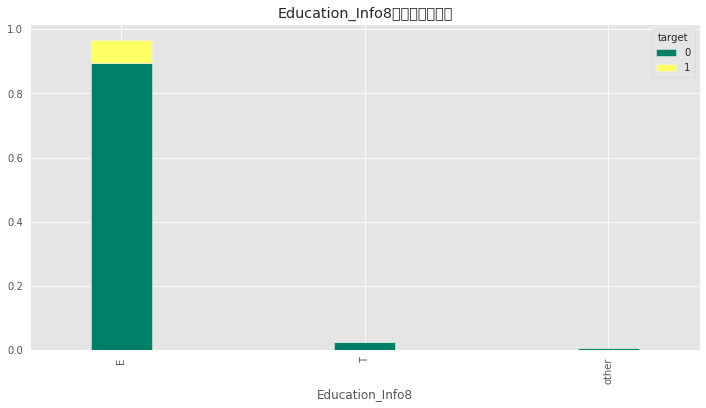

<Figure size 432x288 with 0 Axes>

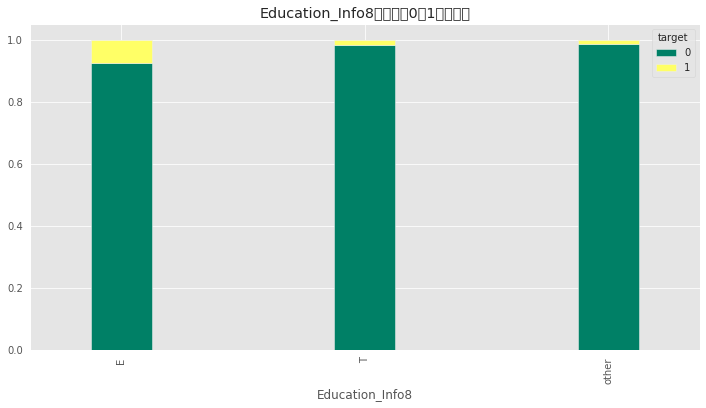

In [48]:
'''
5.4、特征处理
通过可视化结果，特征内存在某几个类别比例过低的情况，将比例低于0.01的类别合并
'''
# 使用feature_list函数创建Education_Info1-8这8个特征名称，并存入edu_list
edu_list = feature_list('Education_Info', 1, 8)
# 使用category_combine函数实现特征内比例低的类别合并
category_combine(featurelist=edu_list)

In [49]:
'''
5.5、数值型特征处理
通过数据处理，Education_Info1-8全部为类别型特征
将Education_Info所有特征进行独热编码转换
'''

# 使用get_dummies方法转换特征
data = pd.get_dummies(data, columns=edu_list)
# 展示结果
data.head()

,target,UserInfo_18,ListingInfo,userinfo_7_不详,userinfo_7_广东,userinfo_7_山东,userinfo_7_江苏,userinfo_7_浙江,userinfo_7_四川,userinfo_7_福建,userinfo_7_湖南,UserInfo_1_0.0,UserInfo_1_1.0,UserInfo_1_2.0,UserInfo_1_3.0,UserInfo_1_4.0,UserInfo_1_5.0,UserInfo_1_6.0,UserInfo_1_7.0,UserInfo_3_0.0,UserInfo_3_1.0,UserInfo_3_2.0,UserInfo_3_3.0,UserInfo_3_4.0,UserInfo_3_5.0,UserInfo_3_6.0,UserInfo_3_7.0,UserInfo_5_1,UserInfo_5_2,UserInfo_5_3,UserInfo_6_1,UserInfo_6_2,UserInfo_6_3,UserInfo_9_不详,UserInfo_9_中国电信,UserInfo_9_中国移动,UserInfo_9_中国联通,UserInfo_10_0,UserInfo_10_1,UserInfo_10_2,UserInfo_14_0,UserInfo_14_1,UserInfo_14_2,UserInfo_14_3,UserInfo_14_4,UserInfo_14_5,UserInfo_14_6,UserInfo_15_0,UserInfo_15_1,UserInfo_15_2,UserInfo_15_3,UserInfo_15_4,UserInfo_15_5,UserInfo_15_6,UserInfo_16_0,UserInfo_16_1,UserInfo_16_2,UserInfo_16_3,UserInfo_16_4,UserInfo_16_6,UserInfo_17_1,UserInfo_17_2,UserInfo_21_0,UserInfo_21_1,UserInfo_22_D,UserInfo_22_other,UserInfo_23_D,UserInfo_23_other,UserInfo_24_D,UserInfo_24_other,Education_Info1_0,Education_Info1_1,Education_Info2_A,Education_Info2_AM,Education_Info2_E,Education_Info2_other,Education_Info3_E,Education_Info3_other,Education_Info3_毕业,Education_Info4_E,Education_Info4_F,Education_Info4_T,Education_Info4_other,Education_Info5_0,Education_Info5_1,Education_Info6_A,Education_Info6_AM,Education_Info6_E,Education_Info6_other,Education_Info7_E,Education_Info7_不详,Education_Info8_E,Education_Info8_T,Education_Info8_other
Idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,0,29,2014/3/5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0
10002,0,28,2014/2/26,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0
10003,0,32,2014/2/28,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0
10006,0,33,2014/2/25,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0
10007,0,43,2014/2/27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0


<Figure size 432x288 with 0 Axes>

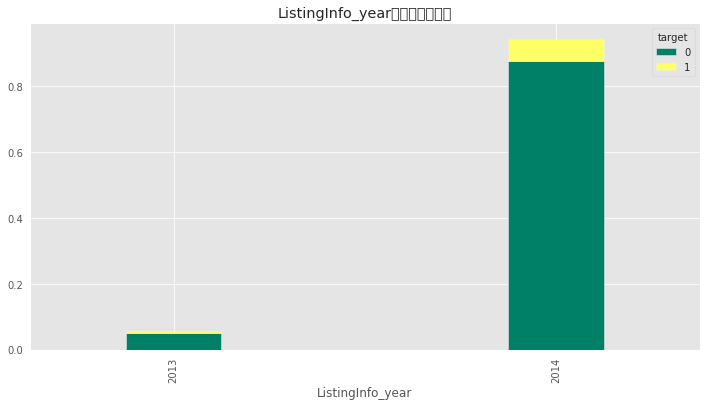

<Figure size 432x288 with 0 Axes>

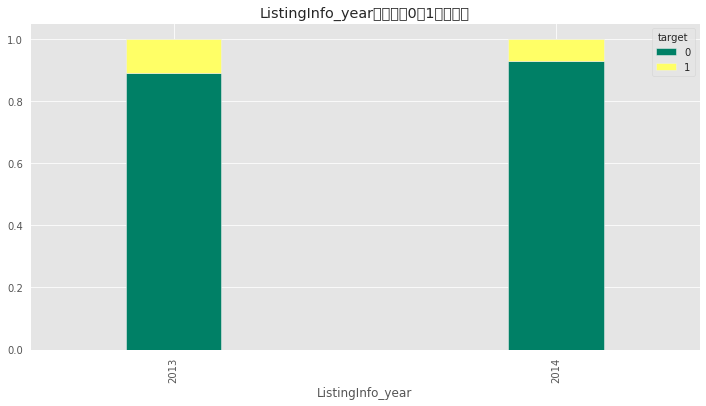

<Figure size 432x288 with 0 Axes>

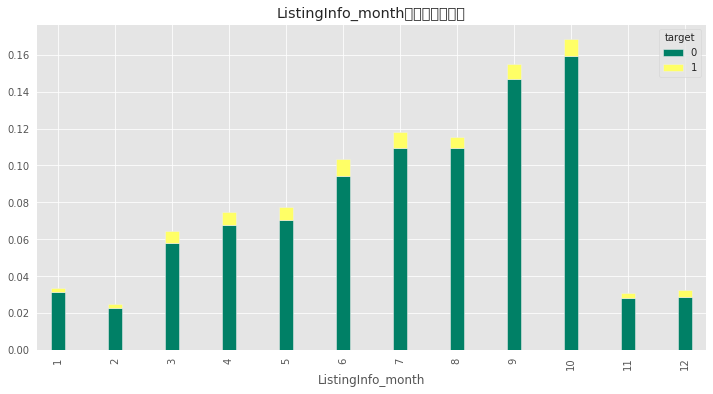

<Figure size 432x288 with 0 Axes>

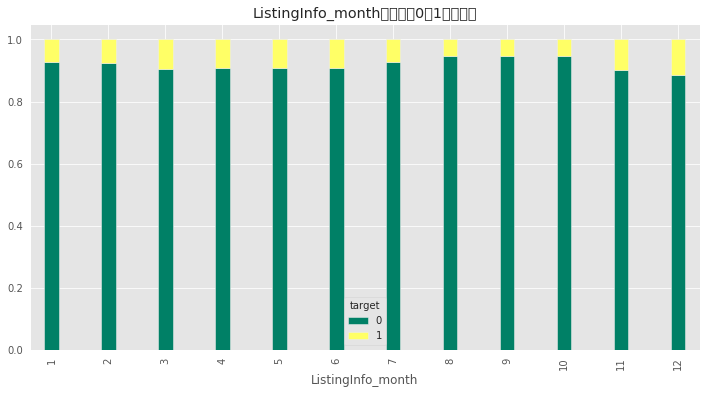

<Figure size 432x288 with 0 Axes>

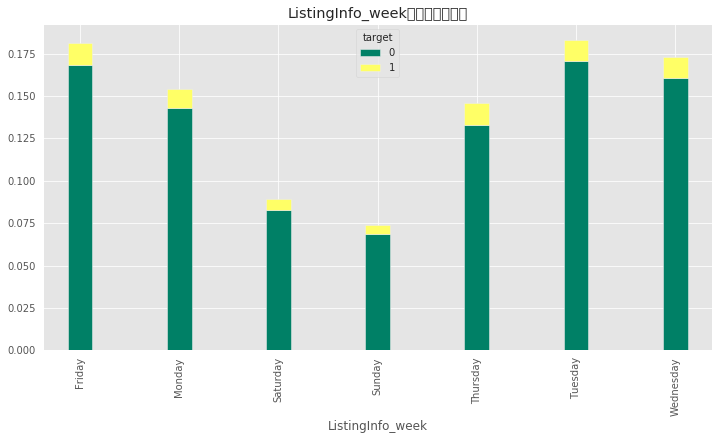

<Figure size 432x288 with 0 Axes>

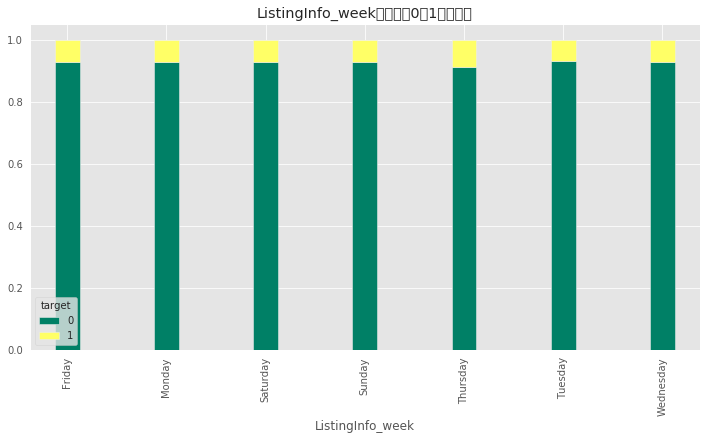

In [50]:
'''
7、ListingInfo数据处理:
7.1 ListingInfo为日期数据，做出如下处理:
(1) 新增加ListingInfo_year特征，数据为日期的年份
(2) 新增加ListingInfo_month特征，数据为日期的月份
(3) 新增加ListingInfo_week特征，数据为日期的星期
以上全部为类别型特征

通过可视化结果可知如下信息:
(1) 年份:2014年数量占比远高于2013年，2013年标签0的占比低于2014年
(2) 月份:3-10月数量占比呈现出明显上升趋势，10月份数量最多
(3) 星期:周3、4、5数量占比最多，周1和周2略低，周6和周日最少

'''
# 使用pd.to_datetime方法将ListingInfo数据转换为时间序列数据
data['ListingInfo'] = pd.to_datetime(data['ListingInfo'])
# 使用dt.year方法生成ListingInfo的年份信息，并存入df_dataset['ListingInfo_year']
data['ListingInfo_year'] = data['ListingInfo'].dt.year
# 使用dt.month方法生成ListingInfo的月份信息，并存入df_dataset['ListingInfo_month']
data['ListingInfo_month'] = data['ListingInfo'].dt.month
# 使用dt.weekday_name方法生成ListingInfo中日期所对应的星期数，并存入df_dataset['ListingInfo_week']
data['ListingInfo_week'] = data['ListingInfo'].dt.weekday_name
# 创建列表listing_list,存储ListingInfo_year、ListingInfo_month和ListingInfo_week特征名称
listing_list = ['ListingInfo_year', 'ListingInfo_month', 'ListingInfo_week']
# 可视化这新增的三个特征的分布结果
figures_in_featurelist(featurelist=listing_list, name='ListingInfo_')

In [51]:
'''
7.2 将ListingInfo_year和ListingInfo_month特征转换为类别型，并删除原始ListingInfo特征
'''
# 使用astype方法将ListingInfo_year特征转换为类别型
data['ListingInfo_year'] = data['ListingInfo_year'].astype(str)
# 使用astype方法将ListingInfo_month特征转换为类别型
data['ListingInfo_month'] = data['ListingInfo_month'].astype(str)
# 删除原始ListingInfo特征
data.drop('ListingInfo', axis=1, inplace=True)

In [52]:
'''
7.3 特征处理
对ListingInfo数据处理新生成3个特征：
ListingInfo_year、ListingInfo_month和ListingInfo_week，这3个特征均为类别型特征
'''
# 创建列表listing_dummies_list，用来存储独热编码转换的特征名称
listing_dummies_list = ['ListingInfo_year', 'ListingInfo_month', 'ListingInfo_week']
# 使用get_dummies方法转换特征
data = pd.get_dummies(data, columns=listing_dummies_list)
# 展示结果
data.head()

,target,UserInfo_18,userinfo_7_不详,userinfo_7_广东,userinfo_7_山东,userinfo_7_江苏,userinfo_7_浙江,userinfo_7_四川,userinfo_7_福建,userinfo_7_湖南,UserInfo_1_0.0,UserInfo_1_1.0,UserInfo_1_2.0,UserInfo_1_3.0,UserInfo_1_4.0,UserInfo_1_5.0,UserInfo_1_6.0,UserInfo_1_7.0,UserInfo_3_0.0,UserInfo_3_1.0,UserInfo_3_2.0,UserInfo_3_3.0,UserInfo_3_4.0,UserInfo_3_5.0,UserInfo_3_6.0,UserInfo_3_7.0,UserInfo_5_1,UserInfo_5_2,UserInfo_5_3,UserInfo_6_1,UserInfo_6_2,UserInfo_6_3,UserInfo_9_不详,UserInfo_9_中国电信,UserInfo_9_中国移动,UserInfo_9_中国联通,UserInfo_10_0,UserInfo_10_1,UserInfo_10_2,UserInfo_14_0,UserInfo_14_1,UserInfo_14_2,UserInfo_14_3,UserInfo_14_4,UserInfo_14_5,UserInfo_14_6,UserInfo_15_0,UserInfo_15_1,UserInfo_15_2,UserInfo_15_3,UserInfo_15_4,UserInfo_15_5,UserInfo_15_6,UserInfo_16_0,UserInfo_16_1,UserInfo_16_2,UserInfo_16_3,UserInfo_16_4,UserInfo_16_6,UserInfo_17_1,UserInfo_17_2,UserInfo_21_0,UserInfo_21_1,UserInfo_22_D,UserInfo_22_other,UserInfo_23_D,UserInfo_23_other,UserInfo_24_D,UserInfo_24_other,Education_Info1_0,Education_Info1_1,Education_Info2_A,Education_Info2_AM,Education_Info2_E,Education_Info2_other,Education_Info3_E,Education_Info3_other,Education_Info3_毕业,Education_Info4_E,Education_Info4_F,Education_Info4_T,Education_Info4_other,Education_Info5_0,Education_Info5_1,Education_Info6_A,Education_Info6_AM,Education_Info6_E,Education_Info6_other,Education_Info7_E,Education_Info7_不详,Education_Info8_E,Education_Info8_T,Education_Info8_other,ListingInfo_year_2013,ListingInfo_year_2014,ListingInfo_month_1,ListingInfo_month_10,ListingInfo_month_11,ListingInfo_month_12,ListingInfo_month_2,ListingInfo_month_3,ListingInfo_month_4,ListingInfo_month_5,ListingInfo_month_6,ListingInfo_month_7,ListingInfo_month_8,ListingInfo_month_9,ListingInfo_week_Friday,ListingInfo_week_Monday,ListingInfo_week_Saturday,ListingInfo_week_Sunday,ListingInfo_week_Thursday,ListingInfo_week_Tuesday,ListingInfo_week_Wednesday
Idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,0,29,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
10002,0,28,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10003,0,32,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10006,0,33,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10007,0,43,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


---

1.0.1 2构造训练及测试数据

In [54]:
'''
由于测试数据集没有标签，无法评估模型，因此，在原训练数据内继续划分训练/测试数据集
'''
# 构造训练数据和测试数据
feature_names = np.array(data.columns[data.columns != 'target'].tolist())
#构造样本数据
X_sample = data[feature_names].values
y_sample = data['target'].values
#将样本数据分为训练及测试数据集，将stratify参数设置为y_sample，按照y_sample中的0、1比例分配 
X_train, X_test, y_train, y_test = train_test_split(X_sample,y_sample, test_size=0.25,
                                                    random_state=2019, stratify=y_sample)

# 创建过采样实例smote
# smote = SMOTE(random_state=0)
# 由于数据集0和1比例失衡，采用过采样技术生成'平衡'的数据
# smote_X, smote_y = smote.fit_sample(X_train, y_train)
# smote_X = pd.DataFrame(smote_X, columns=feature_names)
# smote_y = pd.DataFrame(smote_y, columns=['y'])
#打印训练及测试数据形状
print('训练数据:')
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# print('过采样后数据:')
# print (smote_X.shape, smote_y.shape)

训练数据:
(22500, 113) (7500, 113) (22500,) (7500,)


In [55]:
'''
smote测试
'''
# 创建过采样实例smote
smote = SMOTE(random_state=0)
# 由于数据集0和1比例失衡，采用过采样技术生成'平衡'的数据
smote_X, smote_y = smote.fit_sample(X_train, y_train)
smote_X = pd.DataFrame(smote_X, columns=feature_names)
smote_y = pd.DataFrame(smote_y, columns=['y'])
#打印训练及测试数据形状
print('过采样后数据:')
print (smote_X.shape, smote_y.shape)

过采样后数据:
(41702, 113) (41702, 1)


> #### 2. 特征选择
200多个特征里可能有效的特征不会很多。在这里做特征选择相关的工作。 在特征选择这一块请使用```树```模型。 比如sklearn自带的特征选择模块（https://scikit-learn.org/stable/modules/feature_selection.html）， 或者直接使用XGBoost等模型来直接选择。 这些模型训练好之后你可以直接通过```feature_importance_values```属性来获取。

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# 创建决策树模型
dt_clf = DecisionTreeClassifier(class_weight='balanced')
# 创建随机森林模型
rf_clf = RandomForestClassifier(n_estimators=20, class_weight='balanced')
#树模型需要做交叉验证的参数：
#拆分内部节点所需的最小样本数
params_min_samples_split = [5, 10, 15, 20]
#叶子节点所需的最小样本数
params_min_samples_leaf = [2, 4, 6, 8, 10]
#树的最大深度
params_max_depth = [4, 6, 8, 10]
#创建参数网格
params_ = {'min_samples_split' : params_min_samples_split,
           'min_samples_leaf' : params_min_samples_leaf,
           'max_depth' : params_max_depth}

#通过GridSearchCV进行5折交叉验证,scoring取roc_auc
# grid_dt = GridSearchCV(estimator=dt_clf, param_grid=param_grid_dt, cv=5, scoring='roc_auc')
# 开启超参数空间随机搜索
n_iter_search = 20
random_search = RandomizedSearchCV(estimator=rf_clf,param_distributions=params_,n_iter=n_iter_search,n_jobs=-1)
#进行网格搜索
random_search.fit(X_train, y_train)
#用grid.best_params_方法得到最佳参数，并打印展示
print('最佳参数是:{}'.format(random_search.best_params_))
#用grid.best_score_方法得到最佳得分，并打印展示
print('最佳得分是:{}'.format(random_search.best_score_))
#用grid.best_estimator_方法得到最佳模型，并打印展示
print('最佳模型是:{}'.format(random_search.best_estimator_))

最佳参数是:{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}
最佳得分是:0.6592
最佳模型是:RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


In [57]:
#创建最佳模型
model = random_search.best_estimator_
#训练模型
model.fit(X_train,y_train)
# 被选出来的特征
select_model = SelectFromModel(model, prefit=True)
selected_features = select_model.get_support()
# 重新构造feature_names
feature_names = feature_names[selected_features]
# 重新构造训练数据和测试数据
X_train1 = X_train[:, selected_features]
y_train1 = y_train
X_test1 = X_test[:, selected_features]
y_test1 = y_test
#打印新数据特征数量
print(X_train1.shape, X_test1.shape)

(22500, 42) (7500, 42)


> #### 3. XGBoost来训练风控模型，结果以AUC为准
https://github.com/dmlc/xgboost   这是XGBoost library具体的地址, 具有详细的文档。 https://pypi.org/project/xgboost/ 里有安装的步骤。 试着去调一下它的超参数，使得得到最好的效果。 一定要注意不需要使用测试数据来训练。 最终的结果以测试数据上的AUC为标准。 

In [59]:
%%time
#创建xgboost模型，booster为gbtree，由于样本中0和1的占比接近于15比1，将scale_pos_weight设为15
xgb_clf = XGBClassifier(booster='gbtree', scale_pos_weight=15, eval_metric='auc')
#树的深度
params_max_depth = [4, 6, 8, 10]
#树的个数
params_n_estimators = [100, 200, 300, 400, 500]
#训练每棵树时，使用的特征占全部特征的比例
params_colsample_bytree = [0.3, 0.5, 0.7, 0.9]
#训练每棵树时，使用的样本占全部特征的比例
params_subsample = [0.3, 0.5, 0.7, 0.9]
#创建参数网格
params_xgb = {'max_depth' : params_max_depth,
              'n_estimators' : params_n_estimators,
              'colsample_bytree' : params_colsample_bytree,
              'subsample' : params_subsample}
#通过GridSearchCV进行5折交叉验证，评价标准为roc_auc
# grid_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=5, scoring='roc_auc')
# 开启超参数空间随机搜索
n_iter_search = 20
random_xgb = RandomizedSearchCV(estimator=xgb_clf,
                                param_distributions=params_xgb,
                                n_iter=n_iter_search,
                                scoring='roc_auc',
                                n_jobs=-1)
#进行网格搜索
random_xgb.fit(X_train1,y_train1)
#用grid.best_params_方法得到最佳参数，并打印展示
print('最佳参数是:{}'.format(random_xgb.best_params_))
#用grid.best_score_方法得到最佳得分，并打印展示
print('最佳得分是:{}'.format(random_xgb.best_score_))
#用grid.best_estimator_方法得到最佳模型，并打印展示
print('最佳模型是:{}'.format(random_xgb.best_estimator_))


最佳参数是:{'subsample': 0.9, 'n_estimators': 400, 'max_depth': 4, 'colsample_bytree': 0.3}
最佳得分是:0.6390360434861826
最佳模型是:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=15, seed=None,
              silent=None, subsample=0.9, verbosity=1)
CPU times: user 12.6 s, sys: 126 ms, total: 12.7 s
Wall time: 3min 53s


In [61]:
#建立最佳模型
model_xgb = random_xgb.best_estimator_
#通过测试数据进行预测
predictions_xgb = model_xgb.predict(X_test1)
# 得到auc结果
rf_roc_auc = roc_auc_score(y_test1, predictions_xgb)
# 打印结果
print ("AUC = %2.2f" % rf_roc_auc)
#得出测试结果，生成报告
print('\n\n ---测试报告---')
print(classification_report(y_test1, predictions_xgb))

AUC = 0.62


 ---测试报告---
              precision    recall  f1-score   support

           0       0.95      0.59      0.73      6951
           1       0.11      0.64      0.19       549

    accuracy                           0.59      7500
   macro avg       0.53      0.62      0.46      7500
weighted avg       0.89      0.59      0.69      7500



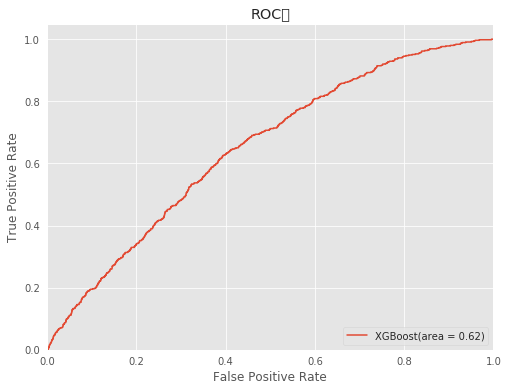

In [62]:
# 使用roc_curve方法计算roc曲线面积
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test1, model_xgb.predict_proba(X_test1)[:,1])
# 设置图片大小
plt.figure(figsize=(8,6))
# 使用plot方法画图
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost(area = %0.2f)' % rf_roc_auc)
# 设置x轴参数范围
plt.xlim([0.0, 1.0])
# 设置y轴参数范围
plt.ylim([0.0, 1.05])
# 设置x轴标签
plt.xlabel('False Positive Rate')
# 设置y轴标签
plt.ylabel('True Positive Rate')
# 设置图的标题
plt.title('ROC图')
# 设置图例位置
plt.legend(loc="lower right")
# 展示结果
plt.show()

> #### 4. LightGBM来训练风控模型，结果以AUC为准

In [65]:
%%time
# coding: utf-8
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt',scale_pos_weight=15)

random_lgb = RandomizedSearchCV(estimator=lgb_clf,
                                param_distributions=params_xgb,
                                n_iter=n_iter_search,
                                scoring='roc_auc',
                                n_jobs=-1)

#进行网格搜索
random_lgb.fit(X_train1,y_train1)
#用grid.best_params_方法得到最佳参数，并打印展示
print('最佳参数是:{}'.format(random_lgb.best_params_))
#用grid.best_score_方法得到最佳得分，并打印展示
print('最佳得分是:{}'.format(random_lgb.best_score_))
#用grid.best_estimator_方法得到最佳模型，并打印展示
print('最佳模型是:{}'.format(random_lgb.best_estimator_))

最佳参数是:{'subsample': 0.3, 'n_estimators': 100, 'max_depth': 4, 'colsample_bytree': 0.9}
最佳得分是:0.6446550677848251
最佳模型是:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9,
               importance_type='split', learning_rate=0.1, max_depth=4,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=15, silent=True, subsample=0.3,
               subsample_for_bin=200000, subsample_freq=0)
CPU times: user 526 ms, sys: 114 ms, total: 640 ms
Wall time: 12.9 s


In [66]:
#建立最佳模型
model_lgb = random_lgb.best_estimator_
#通过测试数据进行预测
predictions_lgb = model_lgb.predict(X_test1)
# 得到auc结果
rf_roc_auc = roc_auc_score(y_test1, predictions_lgb)
# 打印结果
print ("AUC = %2.2f" % rf_roc_auc)
#得出测试结果，生成报告
print('\n\n ---测试报告---')
print(classification_report(y_test1, predictions_lgb))

AUC = 0.60


 ---测试报告---
              precision    recall  f1-score   support

           0       0.96      0.51      0.67      6951
           1       0.10      0.70      0.18       549

    accuracy                           0.52      7500
   macro avg       0.53      0.60      0.42      7500
weighted avg       0.89      0.52      0.63      7500

